### Title: Market Trend analysis & price prediction on used cars. (Regression)

#### 1. Web scraping:

1. The data was scraped using the website cars24, the link of the website: https://www.cars24.com/
2. Data was scraped using the libraries BeautifulSoup and selenium.
3. We tried scraping information about the used cars for 11 different cities.


In [ ]:
#pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the Chrome webdriver using webdriver_manager
options = webdriver.ChromeOptions()
options.headless = True
driver = webdriver.Chrome(options=options)

# Load the webpage
url = 'https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=1968483637.1700757570&storeCityId=134&pinId=201301'
driver.get(url)

# Function to wait for the dynamically loaded content
def wait_for_content_to_load(expected_count):
    try:
        # Wait for at most 10 seconds until the total number of elements exceeds or reaches the expected count
        WebDriverWait(driver, 10).until(
            lambda driver: len(driver.find_elements(By.XPATH, "//div[@class='_2z-Yu']")) >= expected_count
        )
    except Exception as e:
        print(f"Error waiting for content to load: {e}")

# Set the target total number of elements
target_element_count = 1000

# Initial count of product elements
initial_element_count = len(driver.find_elements(By.XPATH, "//div[@class='_2z-Yu']"))

# Scroll until the total count reaches or exceeds the target
while initial_element_count < target_element_count:
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
    # Set the expected count to the target count directly
    expected_count = target_element_count
    wait_for_content_to_load(expected_count)  # Wait for dynamically loaded content
    # Update the initial count after each scroll
    initial_element_count = len(driver.find_elements(By.XPATH, "//div[@class='_2z-Yu']"))

# Get the page source after scrolling
page_source = driver.page_source

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(page_source, 'lxml')

# Extract data from the soup object
name = []
car_type = []
version = []
kms_driven = []
ownership_status = []
oil_type = []
down_payment = []
original_price = []
reduced_price = []
address = []
features = []

cars = soup.find_all('div', class_='_2z-Yu')

for i in cars:
    name.append(i.find('h3').text.strip())
    car_type.append(i.find('li').text.strip())
    version.append(i.find_all('li')[2].text.strip())

    ul_tag = i.find('ul', class_='_13yb6')
    if ul_tag:
        li_tags = ul_tag.find_all('li')
        kms_driven.append(li_tags[0].text.strip())
        ownership_status.append(li_tags[1].text.strip())
        oil_type.append(li_tags[2].text.strip())

    down_payment.append(i.find('strong').text.strip())

    div_tag = i.find('div', class_='_18ToE')
    if div_tag:
        span_tag = div_tag.find('span')
        reduced_price.append(span_tag.text.strip() if span_tag else 'N/A')

        p_tag = div_tag.find('p', class_='eRtfP')
        original_price.append(p_tag.text.strip() if p_tag else 'N/A')

    address.append(i.find('span', class_='_3DYbK').text.strip() if i.find('span', class_='_3DYbK') else 'N/A')

# Create a DataFrame
df = pd.DataFrame({
    'name': name,
    'car_type': car_type,
    'transmission': version,
    'kms_driven': kms_driven,
    'ownership_status': ownership_status,
    'fuel_type': oil_type,
    'down_payment': down_payment,
    'original_price': original_price,
    'reduced_price': reduced_price,
    'address': address,
})

# Print the DataFrame
print(df)

# Close the browser
driver.quit()
# put the scraped data into csv
df.to_csv('Used_car_prices_dataset.csv')'''

#### Description of attributes in the dataset.

1. Name: Contains information about year, make and model.
2. Trim: Different pre-packaged groups of features for a particular car
3. Transmission: Automatic or Manual
4. kms_driven: Number of kms  driven by cars.
5. ownership_status: Number of predeeding owners of the vehicle.
6. fuel_type: type of fuel petrol,diesel, cng
7. emi_per_month: emi to be paid per month
8. original_price: price of the car.
9. Reduced_price: Reduced price of the car.
10. City: The city where the car belongs from.


## ------------------------------------------------------------------------------------------------------------------------------------

#### 2. Data cleaning and formating:

In [1]:
#import all the necessary packages required for this project:
import pandas as pd
import numpy as np
import datetime
import category_encoders as ce
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Used_car_prices_dataset.csv")

In [3]:
#examine tail of the dataset
df.tail()

name                car_type version kms_driven  \
7207  2020 Maruti New Wagon-R                 VXI 1.0  Manual  41,184 km   
7208         2023 Maruti Alto                   LXI O  Manual   1,835 km   
7209       2020 Hyundai VENUE  1.0 turbo GDI IMT SX O  Manual  22,189 km   
7210   2017 Hyundai Grand i10    MAGNA 1.2 KAPPA VTVT  Manual  41,390 km   
7211  2014 Maruti Wagon R 1.0                     VXI  Manual  88,150 km   

     ownership_status oil_type   down_payment original_price reduced_price  \
7207        1st Owner   Petrol   ₹9,208/month      ₹5,41,000     ₹4,71,000   
7208        1st Owner   Petrol   ₹7,840/month      ₹4,32,000     ₹4,01,000   
7209        1st Owner   Petrol  ₹18,139/month     ₹11,19,000     ₹9,53,000   
7210        1st Owner   Petrol   ₹7,801/month      ₹4,28,000     ₹3,99,000   
7211        2nd Owner   Petrol   ₹5,122/month            NaN     ₹2,62,000   

         City  
7207  Lucknow  
7208  Lucknow  
7209  Lucknow  
7210  Lucknow  
7211  Lucknow

##### 2(i): Renaming few columns of the dataset.

In [4]:
##### Rename columns
column_replacements = {
    'version': 'transmission',
    'car_type': 'trim',
    'down_payment': 'emi_per_month',
    'oil_type': 'fuel_type'
}

# Use the dictionary for renaming
df.rename(columns=column_replacements, inplace=True)

# Display the updated DataFrame
df.head()

name     trim transmission   kms_driven  \
0  2019 Maruti Vitara Brezza      VDI       Manual    55,523 km   
1          2015 Maruti Swift  VDI ABS       Manual  1,17,499 km   
2          2018 Maruti Swift      VXI       Manual    91,534 km   
3  2019 Maruti Vitara Brezza      VDI       Manual    50,767 km   
4       2015 Maruti Alto 800      LXI       Manual    35,843 km   

  ownership_status fuel_type  emi_per_month original_price reduced_price  \
0        1st Owner    Diesel  ₹15,327/month      ₹8,19,000     ₹7,84,000   
1        1st Owner    Diesel   ₹7,351/month      ₹4,19,000     ₹3,76,000   
2        2nd Owner    Petrol   ₹9,951/month      ₹5,37,000     ₹5,09,000   
3        1st Owner    Diesel  ₹14,975/month      ₹8,19,000     ₹7,66,000   
4        3rd Owner    Petrol   ₹4,594/month            NaN     ₹2,35,000   

        City  
0  New Delhi  
1  New Delhi  
2  New Delhi  
3  New Delhi  
4  New Delhi

In [5]:
df.isnull().sum()

name                  0
trim                  0
transmission          0
kms_driven            0
ownership_status      0
fuel_type             0
emi_per_month         0
original_price      693
reduced_price         0
City                  0
dtype: int64

##### Observations: 
The dataset has missing values in the original price column.

##### 2(ii): Examine "kms_driven" column:

In [6]:
df['kms_driven'].unique()

array(['55,523 km', '1,17,499 km', '91,534 km', ..., '22,189 km',
       '41,390 km', '88,150 km'], dtype=object)

In [7]:
# Remove 'km' and commas from the 'kms_driven' column
df['kms_driven'] = df['kms_driven'].str.replace(' km', '').str.replace(',', '')

# Convert the column to numeric type
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

# Display the modified DataFrame
print(df['kms_driven'].unique())


[ 55523 117499  91534 ...  22189  41390  88150]


In [8]:
df.head()

name     trim transmission  kms_driven  \
0  2019 Maruti Vitara Brezza      VDI       Manual       55523   
1          2015 Maruti Swift  VDI ABS       Manual      117499   
2          2018 Maruti Swift      VXI       Manual       91534   
3  2019 Maruti Vitara Brezza      VDI       Manual       50767   
4       2015 Maruti Alto 800      LXI       Manual       35843   

  ownership_status fuel_type  emi_per_month original_price reduced_price  \
0        1st Owner    Diesel  ₹15,327/month      ₹8,19,000     ₹7,84,000   
1        1st Owner    Diesel   ₹7,351/month      ₹4,19,000     ₹3,76,000   
2        2nd Owner    Petrol   ₹9,951/month      ₹5,37,000     ₹5,09,000   
3        1st Owner    Diesel  ₹14,975/month      ₹8,19,000     ₹7,66,000   
4        3rd Owner    Petrol   ₹4,594/month            NaN     ₹2,35,000   

        City  
0  New Delhi  
1  New Delhi  
2  New Delhi  
3  New Delhi  
4  New Delhi

##### Observations:
1. As a part of preprocessing all the unnecessary characters from 'km_driven' column were removed.

##### 2(iii): Examine "Emi_per_month" column:

In [9]:
df['emi_per_month'].unique()

array(['₹15,327/month', '₹7,351/month', '₹9,951/month', ...,
       '₹6,280/month', '₹6,811/month', '₹13,533/month'], dtype=object)

In [10]:
# Remove unnecessary symbols and keep only numbers
df['emi_per_month'] = df['emi_per_month'].replace('[\₹,/month]', '', regex=True)

# Convert the column to numeric type
df['emi_per_month'] = pd.to_numeric(df['emi_per_month'], errors='coerce')

# Display the modified DataFrame
print(df['emi_per_month'].unique())


[15327  7351  9951 ...  6280  6811 13533]


In [11]:
df.head()

name     trim transmission  kms_driven  \
0  2019 Maruti Vitara Brezza      VDI       Manual       55523   
1          2015 Maruti Swift  VDI ABS       Manual      117499   
2          2018 Maruti Swift      VXI       Manual       91534   
3  2019 Maruti Vitara Brezza      VDI       Manual       50767   
4       2015 Maruti Alto 800      LXI       Manual       35843   

  ownership_status fuel_type  emi_per_month original_price reduced_price  \
0        1st Owner    Diesel          15327      ₹8,19,000     ₹7,84,000   
1        1st Owner    Diesel           7351      ₹4,19,000     ₹3,76,000   
2        2nd Owner    Petrol           9951      ₹5,37,000     ₹5,09,000   
3        1st Owner    Diesel          14975      ₹8,19,000     ₹7,66,000   
4        3rd Owner    Petrol           4594            NaN     ₹2,35,000   

        City  
0  New Delhi  
1  New Delhi  
2  New Delhi  
3  New Delhi  
4  New Delhi

##### Observations:
1. As a part of preprocessing all the unnecessary characters from 'emi_per_month' column were removed.

##### 2(iv): Examine "Reduced_price" column

In [12]:
df['reduced_price'].unique()

array(['₹7,84,000', '₹3,76,000', '₹5,09,000', ..., '₹3,21,250',
       '₹3,48,400', '₹6,92,200'], dtype=object)

In [13]:
df['reduced_price'].isnull().sum()

0

In [14]:
# Remove unnecessary symbols and keep only numbers
df['reduced_price'] = df['reduced_price'].replace('[\₹,]', '', regex=True)

# Convert the column to numeric type
df['reduced_price'] = pd.to_numeric(df['reduced_price'], errors='coerce')

# Display the modified DataFrame
print(df['reduced_price'].unique())


[784000 376000 509000 ... 321250 348400 692200]


In [15]:
df.head()

name     trim transmission  kms_driven  \
0  2019 Maruti Vitara Brezza      VDI       Manual       55523   
1          2015 Maruti Swift  VDI ABS       Manual      117499   
2          2018 Maruti Swift      VXI       Manual       91534   
3  2019 Maruti Vitara Brezza      VDI       Manual       50767   
4       2015 Maruti Alto 800      LXI       Manual       35843   

  ownership_status fuel_type  emi_per_month original_price  reduced_price  \
0        1st Owner    Diesel          15327      ₹8,19,000         784000   
1        1st Owner    Diesel           7351      ₹4,19,000         376000   
2        2nd Owner    Petrol           9951      ₹5,37,000         509000   
3        1st Owner    Diesel          14975      ₹8,19,000         766000   
4        3rd Owner    Petrol           4594            NaN         235000   

        City  
0  New Delhi  
1  New Delhi  
2  New Delhi  
3  New Delhi  
4  New Delhi

##### Observations:
1. This column has no missing values.
2. All the unnecessary characters were removed from this column and the data has been converted to numeric format.

##### 2(v): Examine "original_price" column

In [16]:
df['original_price'].nunique()

1253

In [17]:
df['original_price'].isnull().sum()

693

In [18]:
# Impute missing original prices with reduced prices
df['original_price'].fillna(df['reduced_price'], inplace=True)

# Verify that there are no more missing values in the original_price column
print(df['original_price'].isnull().sum())


0


In [19]:
# Remove unnecessary symbols and keep only numbers
df['original_price'] = df['original_price'].replace('[\₹,]', '', regex=True)

# Convert the column to numeric type
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce')

# Display the modified DataFrame
print(df['original_price'].unique())


[ 819000  419000  537000 ...  913000 1164000 1243000]


In [20]:
df.head()

name     trim transmission  kms_driven  \
0  2019 Maruti Vitara Brezza      VDI       Manual       55523   
1          2015 Maruti Swift  VDI ABS       Manual      117499   
2          2018 Maruti Swift      VXI       Manual       91534   
3  2019 Maruti Vitara Brezza      VDI       Manual       50767   
4       2015 Maruti Alto 800      LXI       Manual       35843   

  ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0        1st Owner    Diesel          15327          819000         784000   
1        1st Owner    Diesel           7351          419000         376000   
2        2nd Owner    Petrol           9951          537000         509000   
3        1st Owner    Diesel          14975          819000         766000   
4        3rd Owner    Petrol           4594          235000         235000   

        City  
0  New Delhi  
1  New Delhi  
2  New Delhi  
3  New Delhi  
4  New Delhi

##### Observations:

1. This column original_price had 693 missing values.
2. As a part of data preprocessing all the unncessary characters were removed.
3. The missing values in this column indicate that there is only one fixed price for these 693 and hence the respective reduced_prices were imputed in place of the original_prices.

## -------------------------------------------------------------------------------------------------------------------------------------

#### 3. Feature Engineering:

As a part of analysis, we decided to create a bunch of new features from already existing features in the dataset. The new features created are:
1. Year
2. Make
3. Model
4. car_age
5. depriciation_rate
6. Mileage_per_year

##### 3(i): Creating features Year, Make and Model out of 'Name' feature.

In [21]:
df['name'].nunique()

586

In [22]:
# Extract year, make, and model from the car_name column
df['Year'] = df['name'].str.extract('(\d{4})', expand=False)
df['Make'] = df['name'].str.extract('\d{4}\s+([a-zA-Z]+)\s+', expand=False)
df['Model'] = df['name'].str.extract('\d{4}\s+[a-zA-Z]+\s+(.*)', expand=False)

In [23]:
# Reordering the dataframe
column_order = ['Year', 'Make', 'Model'] + [col for col in df.columns if col not in ['Year', 'Make', 'Model']]

# Reorder the DataFrame based on the specified column order
df = df[column_order]

In [24]:
# drop 'name' column
df = df.drop('name', axis=1)

# Display the modified DataFrame
df.head()


Year    Make          Model     trim transmission  kms_driven  \
0  2019  Maruti  Vitara Brezza      VDI       Manual       55523   
1  2015  Maruti          Swift  VDI ABS       Manual      117499   
2  2018  Maruti          Swift      VXI       Manual       91534   
3  2019  Maruti  Vitara Brezza      VDI       Manual       50767   
4  2015  Maruti       Alto 800      LXI       Manual       35843   

  ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0        1st Owner    Diesel          15327          819000         784000   
1        1st Owner    Diesel           7351          419000         376000   
2        2nd Owner    Petrol           9951          537000         509000   
3        1st Owner    Diesel          14975          819000         766000   
4        3rd Owner    Petrol           4594          235000         235000   

        City  
0  New Delhi  
1  New Delhi  
2  New Delhi  
3  New Delhi  
4  New Delhi

##### Observations:

1. 'Name' column holds the information of 'year', 'Make' and 'Model". And hence, all these values were split are the resultant features were created.


##### 3(ii): Creating the feature 'car_age':

In [25]:
df['Year'] = df['Year'].astype(int)  # Convert 'year' column to integer
df['car_age'] = datetime.datetime.now().year - df['Year']

In [26]:
df.head(2)

Year    Make          Model     trim transmission  kms_driven  \
0  2019  Maruti  Vitara Brezza      VDI       Manual       55523   
1  2015  Maruti          Swift  VDI ABS       Manual      117499   

  ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0        1st Owner    Diesel          15327          819000         784000   
1        1st Owner    Diesel           7351          419000         376000   

        City  car_age  
0  New Delhi        5  
1  New Delhi        9

##### Observations:
1. A new feature 'car_age' has been created out of the 'year' column. The age of the car can be crucial factor in determining the price of the car. And as a result this feature was created.

##### 3(iii): Creating the feature 'depreciation_rate':

In [27]:
# Create a new column 'depreciation_rate' and calculate the values

df['depreciation_rate'] = 0  # Initialize the new column

# Calculate depreciation rate
df['depreciation_rate'] = ((df['original_price'] - df['reduced_price']) / df['original_price']) * 100

# Display the updated DataFrame
df.head(2)


Year    Make          Model     trim transmission  kms_driven  \
0  2019  Maruti  Vitara Brezza      VDI       Manual       55523   
1  2015  Maruti          Swift  VDI ABS       Manual      117499   

  ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0        1st Owner    Diesel          15327          819000         784000   
1        1st Owner    Diesel           7351          419000         376000   

        City  car_age  depreciation_rate  
0  New Delhi        5           4.273504  
1  New Delhi        9          10.262530

##### Observations:

Depreciation refers to the decrease in the value of an asset over time. In this context, it represents how much the car's value has decreased from its original price. This feature is relatively important to predict the cars resale value.

##### 3(iv): Creating feature 'Mileage_per_year'

In [28]:
df['mileage_per_year'] = 0  # Initialize the new column

# Calculate mileage per year
df['mileage_per_year'] = df['kms_driven'] / df['car_age']

# Display the updated DataFrame
df.head(2)


Year    Make          Model     trim transmission  kms_driven  \
0  2019  Maruti  Vitara Brezza      VDI       Manual       55523   
1  2015  Maruti          Swift  VDI ABS       Manual      117499   

  ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0        1st Owner    Diesel          15327          819000         784000   
1        1st Owner    Diesel           7351          419000         376000   

        City  car_age  depreciation_rate  mileage_per_year  
0  New Delhi        5           4.273504      11104.600000  
1  New Delhi        9          10.262530      13055.444444

In [29]:
# Identify rows with infinite values in 'mileage_per_year'
rows_with_inf = df[df['mileage_per_year'] == np.inf]

# Display the rows with infinite values
rows_with_inf.shape


(0, 15)

In [30]:
# Identify rows with infinite values in 'mileage_per_year'
rows_with_inf = df[df['mileage_per_year'] == np.inf]

# Delete rows with infinite values
df = df.drop(rows_with_inf.index)

# Reset the index after deletion
df = df.reset_index(drop=True)

# Display the updated DataFrame
df.head(2)


Year    Make          Model     trim transmission  kms_driven  \
0  2019  Maruti  Vitara Brezza      VDI       Manual       55523   
1  2015  Maruti          Swift  VDI ABS       Manual      117499   

  ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0        1st Owner    Diesel          15327          819000         784000   
1        1st Owner    Diesel           7351          419000         376000   

        City  car_age  depreciation_rate  mileage_per_year  
0  New Delhi        5           4.273504      11104.600000  
1  New Delhi        9          10.262530      13055.444444

##### Observations:

1. A last feature "mileage_per_year" was calculated. This was calculated by dividing the 'kms_driven" column by "car_age". 
2. The purpose behind creating this feature was  "Mileage_per_year" provides insights into the intensity of a car's use, reflecting its overall wear and tear. Buyers often consider lower mileage as an indicator of better reliability and potentially fewer mechanical issues.
3. After creation this column had 'infinite' values. It was because the cars for the year 2023 will have '0' as car_age. As a result upon division with 'kms_driven' it will lead to a infite values.
4. since there were only 26 rows in the dataset with infinite values. All the rows were dropped.

## ------------------------------------------------------------------------------------------------------------------------------------

#### 3. EDA 

##### 3(i): Univariate analysis - Numeric columns:

For all the numeric columns in the dataset a univariate analysis has been done. For every column a histogram has been plotted. The numeric columns that were used are: kms_driven, down_payment_per_month,original_price, reduced_price, depreciation_rate, mileage_per_year.

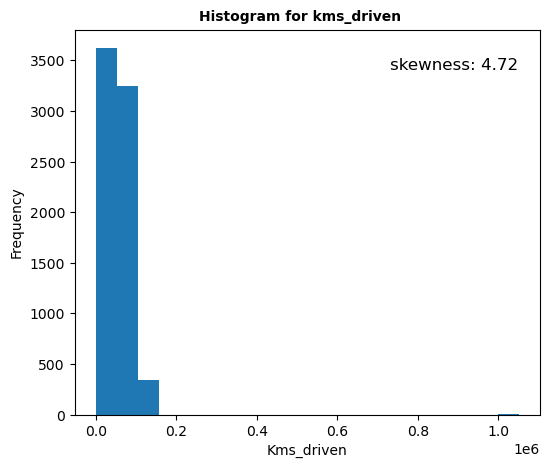

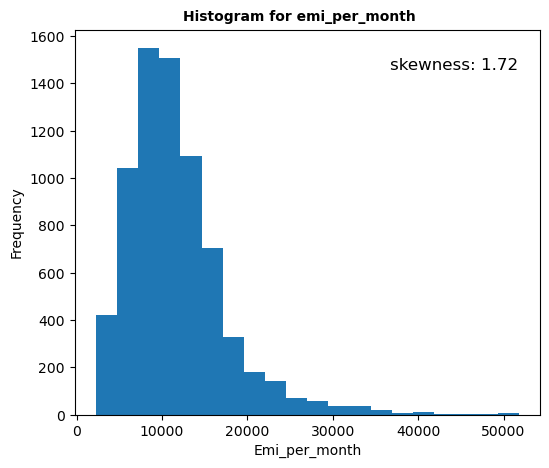

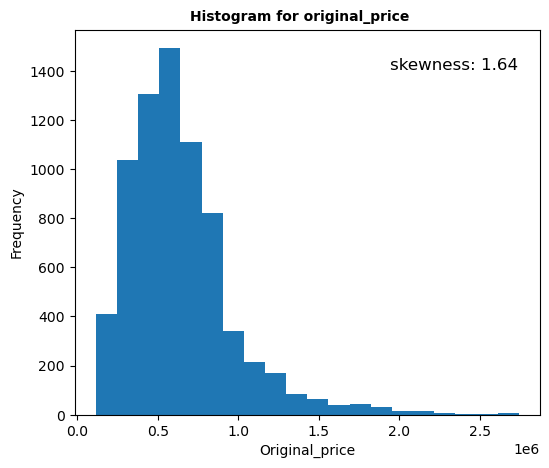

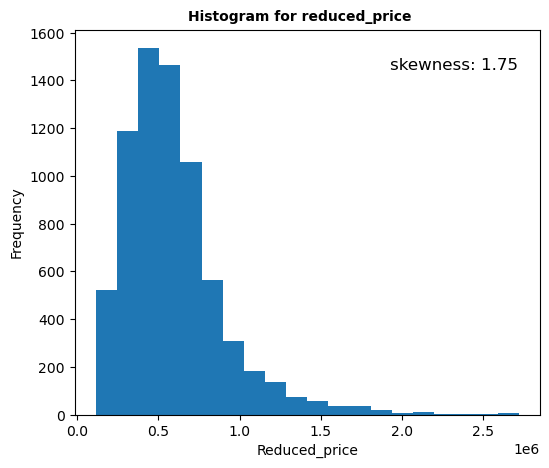

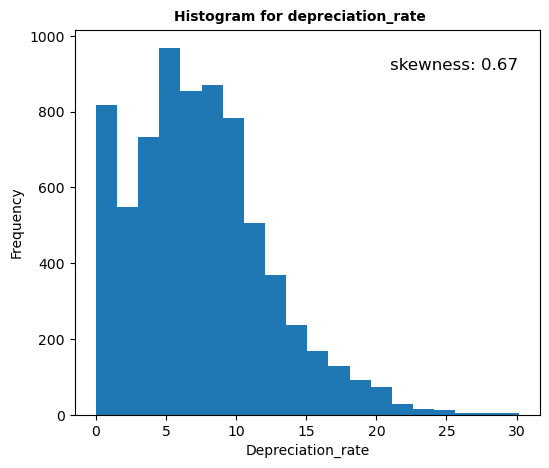

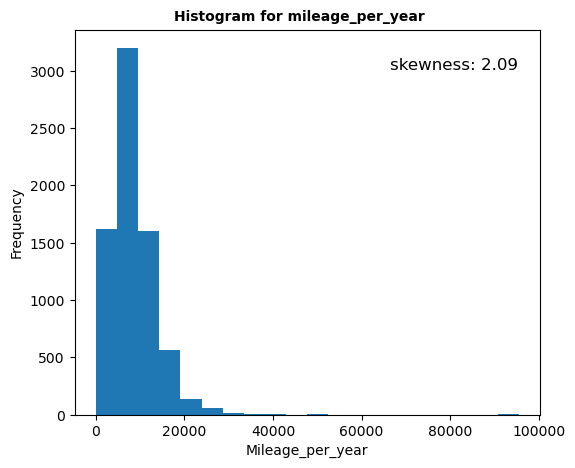

In [31]:
import matplotlib.pyplot as plt

def plot_histogram(df, column):
    fig = plt.figure(figsize=(6, 5))

    # Plot histogram
    plt.hist(df[column], bins=20)

    # Set title and labels
    fig.suptitle(f"Histogram for {column}", fontweight="bold", fontsize=10, y=0.92)
    plt.xlabel(column.capitalize())
    plt.ylabel("Frequency")

    # Calculate and display skewness
    skewness = df[column].skew()
    plt.figtext(0.65, 0.8, f'skewness: {skewness:.2f}', fontsize=12)

# Call the function for each column
for column in ["kms_driven", "emi_per_month", "original_price", "reduced_price", "depreciation_rate", "mileage_per_year"]:
    plot_histogram(df, column)

# Show the plots
plt.show()


##### Observations:

Histograms have been plotted for all numeric columns of our dataset and based on the plots certain observations can be made, The columns "kms_driven", "emi_per_month","original_price", "reduced_price", "depreciation_rate", "mileage_per_year" are all right skewed.

This type of data distribution indicates that the indeed has outliers and we need to analyze the data further for outliers.

##### 3(ii): Univariate analysis - categorical columns:

For all the categorical columns in the dataset, univariate analysis is conducted by plotting pie-charts, barplots, countplots and many more.
This kind of analysis involves analysing one attribute at a time.

##### Visualize "Make" column 

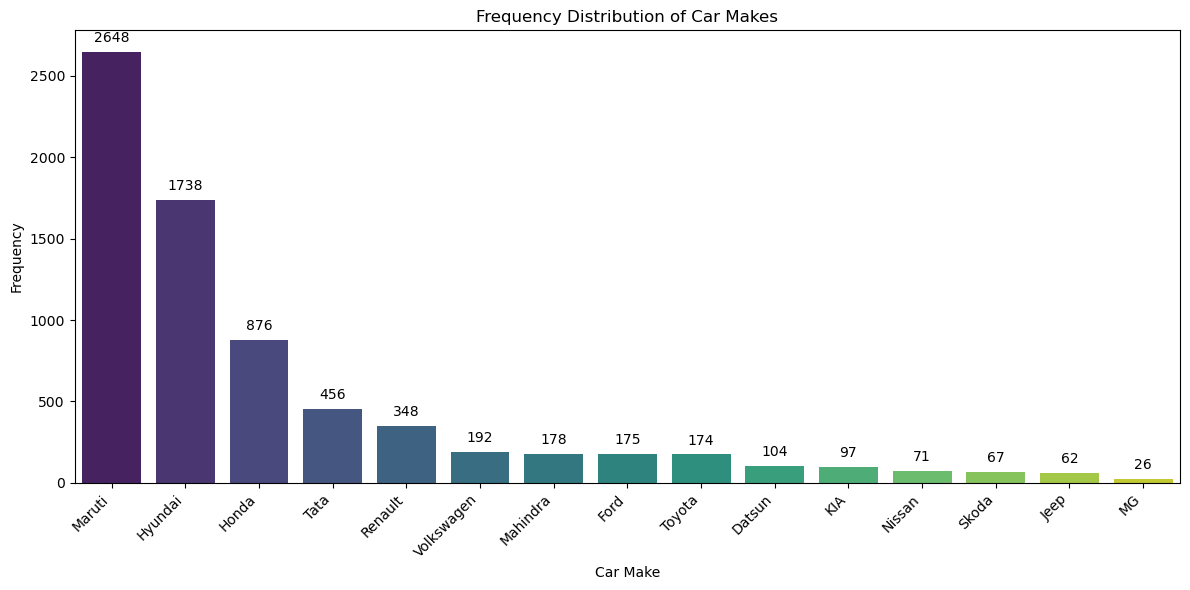

In [32]:
# Get the frequency count for each car make
make_counts = df['Make'].value_counts()

# Plotting using Seaborn for better aesthetics
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Make', data=df, order=make_counts.index, palette='viridis')

# Display frequency counts on top of each bar
for p, count in zip(ax.patches, make_counts):
    ax.annotate(count, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Car Makes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  
plt.show()

##### Observations:

1. The count plot shows us that the highest frequent car brand available in the dataset is 'Maruti suzuki" followed by 'Hyundai', 'Honda', 'Tata' and many more.
2. Higher frequency distribution of a certain car brand represents the demand the particular vehicle has in the market. It indicates that the customers are majorly interested in buying vehicle from the 'Maruti Suzuki" followed by 'Hyundai', 'Honda' and so on. The higher frequency counts suggest that cars from makes like Maruti, Hyundai, and Honda are more prevalent or popular in the market.

##### Visualize "Transmission" column

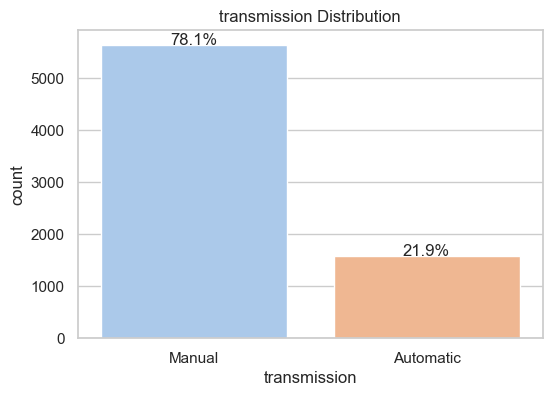

In [33]:
sns.set(style="whitegrid")

# Count the occurrences of each ownership status
ownership_counts = df['transmission'].value_counts()

# Plotting a pie chart using Seaborn
plt.figure(figsize=(6, 4))
sns.set_palette("pastel")
sns.countplot(x='transmission', data=df, order=ownership_counts.index)
plt.title('transmission Distribution')

# Adding percentages on top of each bar
total = len(df['transmission'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center")

plt.show()

##### Observations:
1. 78.1% vehicle in the dataset are of manual Transmission type.
2. 21.9% vehicles in the dataset are of Automatic transmission type.
3. This indicates that the demand and the usage of manual cars is higher as compared to Automatic cars.

##### Visualize 'Ownership_status' column

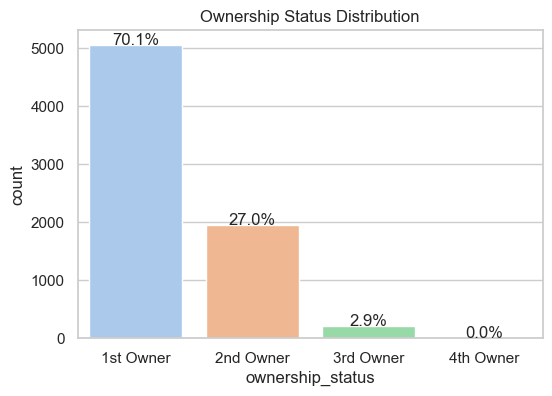

In [34]:
sns.set(style="whitegrid")

# Count the occurrences of each ownership status
ownership_counts = df['ownership_status'].value_counts()

# Plotting a pie chart using Seaborn
plt.figure(figsize=(6, 4))
sns.set_palette("pastel")
sns.countplot(x='ownership_status', data=df, order=ownership_counts.index)
plt.title('Ownership Status Distribution')

# Adding percentages on top of each bar
total = len(df['ownership_status'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center")

plt.show()

##### Observations:

1. 70.0% vehicles in the dataset were driven by 1st owner followed by 27% driven by 2nd owner and 2.9% were driven by 3rd owner and so on.
2. The effect have of ownership_status on the price of the car needs to be evaluated.


##### Visualize "fuel_type" column

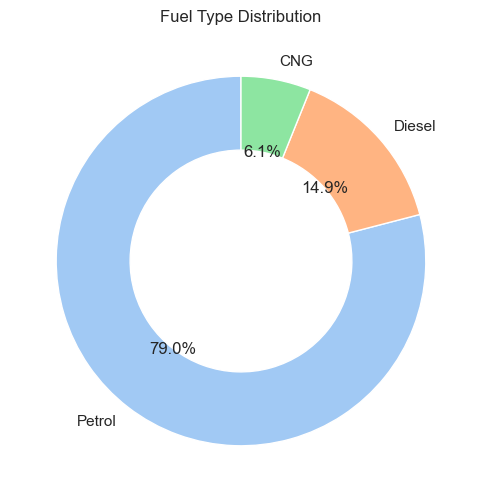

In [35]:
# Set the style
sns.set(style="whitegrid")

# Count the occurrences of each fuel type
fuel_counts = df['fuel_type'].value_counts()

# Plotting a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Fuel Type Distribution')

plt.show()

##### Observations:

1. Approx 80% cars in the dataset are petrol based cars. While 15% cars are of diesel_type and 6% as cng type.
2. A higher number of petrol_type cars indicate that the consumers prefer to buy petrol based vehicles at first place. 

##### Visualize "city" column

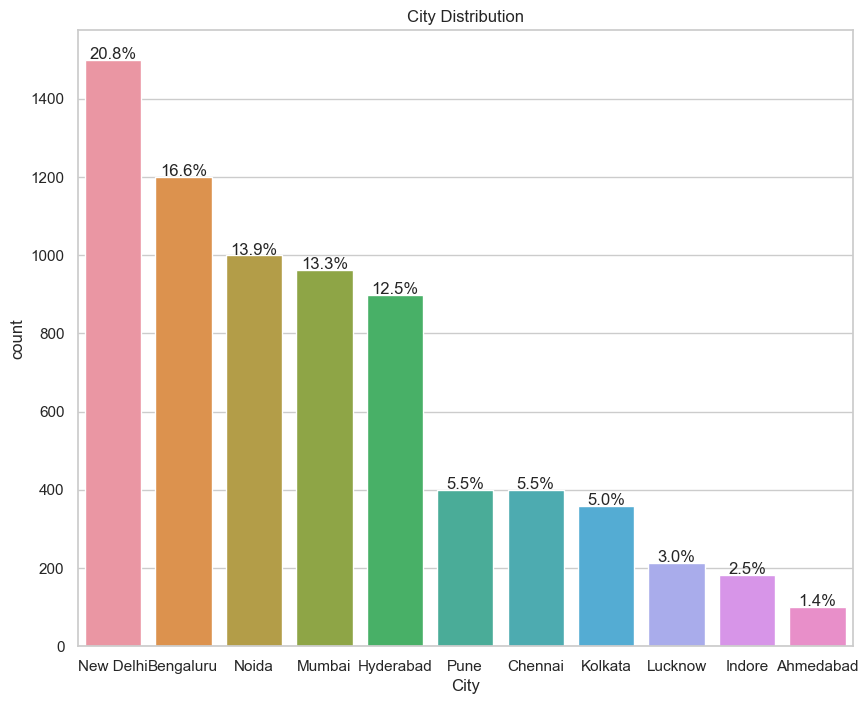

In [36]:
sns.set(style="whitegrid")

# Count the occurrences of each ownership status
ownership_counts = df['City'].value_counts()

# Plotting a pie chart using Seaborn
plt.figure(figsize=(10, 8))
sns.set_palette("pastel")
sns.countplot(x='City', data=df, order=ownership_counts.index)
plt.title('City Distribution')

# Adding percentages on top of each bar
total = len(df['City'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center")

plt.show()

##### Observations:

1. The prices of the cars can vary for different cities. It is important for us to conduct more analysis to understand the relationship of cities w.r.t price.

##### 3(iii) Bivariate Analysis - Numeric columns:

##### Scatter plot between 'kms_driven' and 'reduced_price'

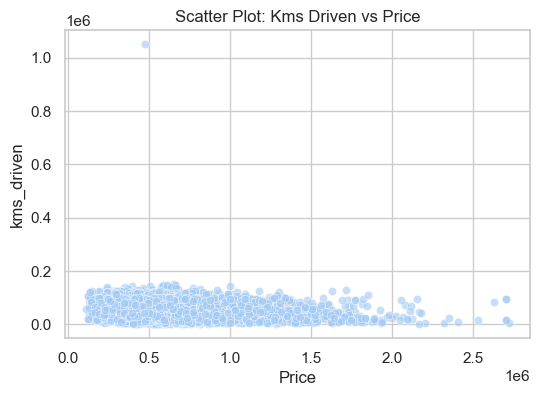

In [37]:
# Scatter plot between 'kms_driven' and 'reduced_price'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='reduced_price', y='kms_driven', data=df, alpha=0.6)
plt.title('Scatter Plot: Kms Driven vs Price')
plt.xlabel('Price')
plt.ylabel('kms_driven')
plt.show()

##### Observations:

1. The lesser the car is driven the more is the price of the car and vice versa.
2. The kms_driven of the car is inversely proportioanl to the price.

##### Scatter plot between 'depreciation_rate' and 'reduced_price' 

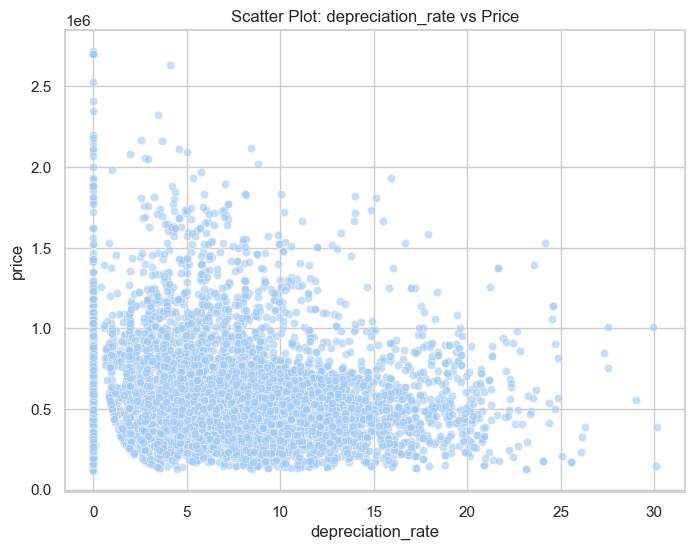

In [38]:
# Scatter plot between 'depreciation_rate' and 'reduced_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='depreciation_rate', y='reduced_price', data=df, alpha=0.6)
plt.title('Scatter Plot: depreciation_rate vs Price')
plt.xlabel('depreciation_rate')
plt.ylabel('price')
plt.show()

##### Observations:

1. It can be observed that as the depreciation_rate increases the price of the the vehicle decreases. Similarly, the vehicles with lower depreciation_rate have higher prices.
2. Overall, the points are scattered which makes the plot difficult to interpret.

##### Scatter plot between 'mileage_per_year' and 'reduced_price'


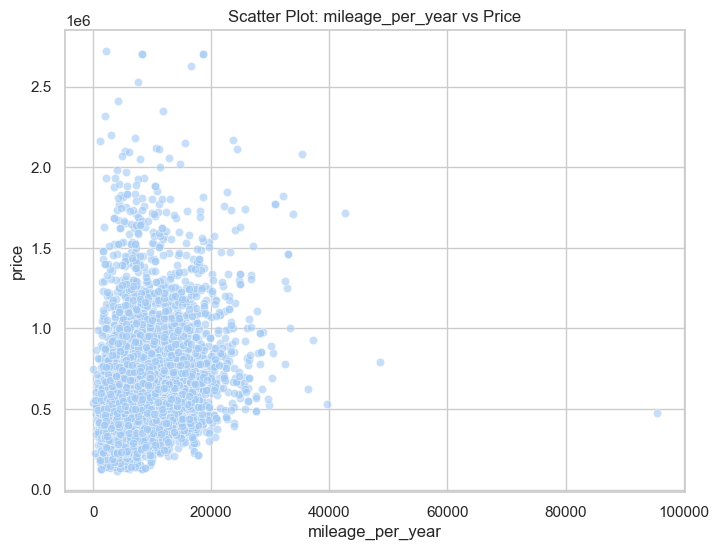

In [39]:
# Scatter plot between 'mileage_per_year' and 'reduced_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage_per_year', y='reduced_price', data=df, alpha=0.6)
plt.title('Scatter Plot: mileage_per_year vs Price')
plt.xlabel('mileage_per_year')
plt.ylabel('price')
plt.show()

##### Observations:

1. There is a negative correlation between mileage_per_year and reduced_price. In other words, cars with lower mileage per year have higher prices, and vice versa.

##### 3(iv) : Bivariate Analysis - categorical columns:

##### "Car_age" vs 'kms_driven'

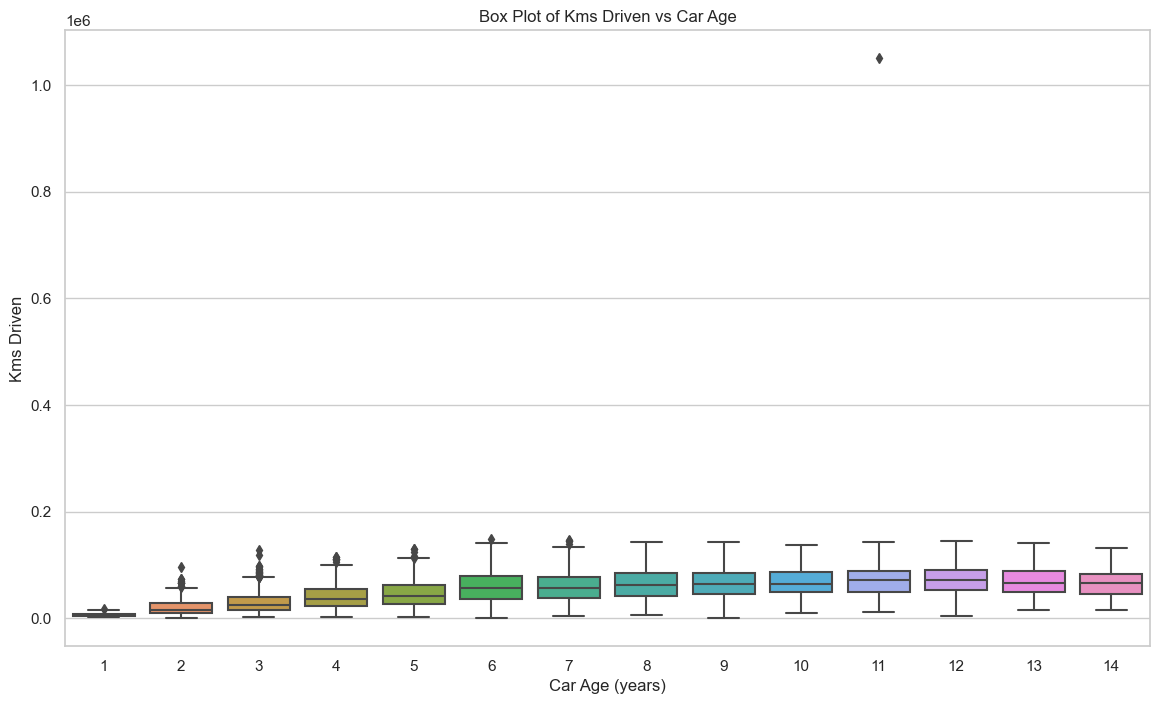

In [40]:
# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='car_age', y='kms_driven', data=df)

# Set plot labels and title
plt.title('Box Plot of Kms Driven vs Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Kms Driven')

# Show the plot
plt.show()

##### Observations:

1. Newer cars are less driven and as the age of the car increases the the kms_driven also increase.
2. Newer cars typically have lower mileage since they have been on the road for a shorter period. As cars age, they tend to accumulate more kilometers as they are used over the years. 

##### 'car_age' vs 'price' 

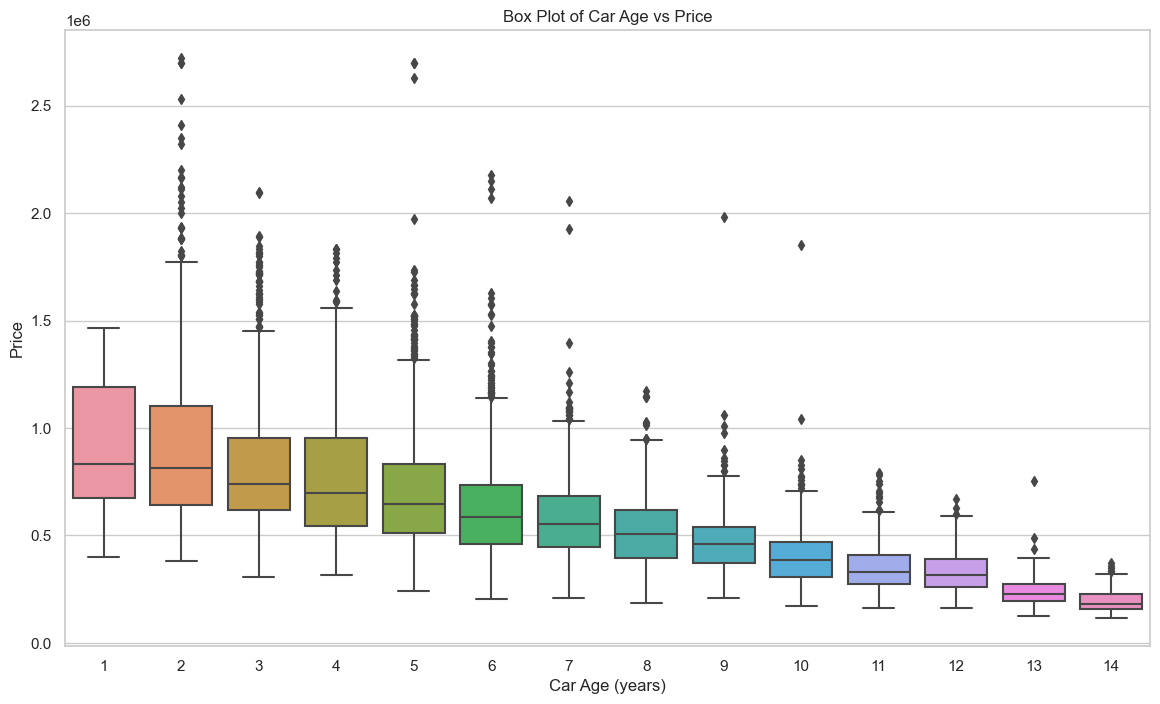

In [41]:
# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='car_age', y='reduced_price', data=df)

# Set plot labels and title
plt.title('Box Plot of Car Age vs Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Price')

# Show the plot
plt.show()

##### Observations:

1. As the age of the car increase the price of the car reduces.
2. Older cars may exhibit more wear and tear, and buyers might factor in potential maintenance or repair costs.
3. Newer models are generally in higher demand, leading to higher prices. As cars age, the demand tends to decrease, influencing pricing.

##### "Ownership_status" vs "price"

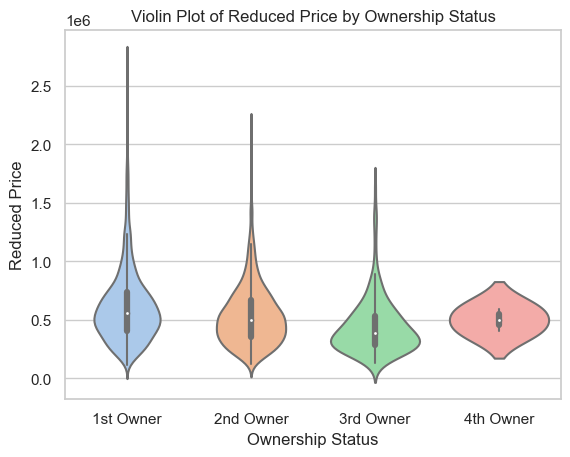

In [42]:
sns.violinplot(x='ownership_status', y='reduced_price', data=df)
plt.title('Violin Plot of Reduced Price by Ownership Status')
plt.xlabel('Ownership Status')
plt.ylabel('Reduced Price')
plt.show()

##### Observations:

1. The price of cars with less owners are high compared to the cars with more owners.
2. Cars with fewer owners may be better maintained and in better overall condition. A single-owner car, for example, might have a well-documented maintenance history.
3. Buyers often prefer cars with fewer owners because it suggests a more stable ownership history. Multiple owners might raise questions about the car's performance or history.
4. Cars with fewer owners often have higher resale value because they are perceived as more desirable in the used car market.

##### "Transmission" vs 'Reduced_price'.

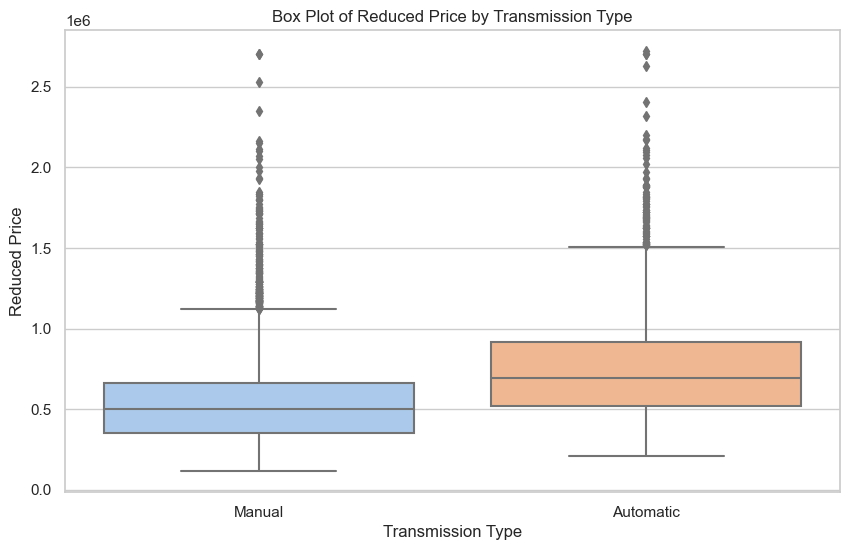

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='reduced_price', data=df)
plt.title('Box Plot of Reduced Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Reduced Price')
plt.show()

##### Observations:

1. Automatic cars are expensive as compared to manual cars.
2. The demand for automatic cars has been increasing, and manufacturers often price them higher to capitalize on this demand. As more consumers prefer automatic transmissions, manufacturers adjust pricing accordingly.
3.  Automatic transmissions are often preferred for their convenience. The ease of driving without manually shifting gears can make automatic cars more appealing to a broader range of consumers.
4. Automatic transmissions are generally more complex and expensive to manufacture than manual transmissions. 

##### "Make" vs 'Price'

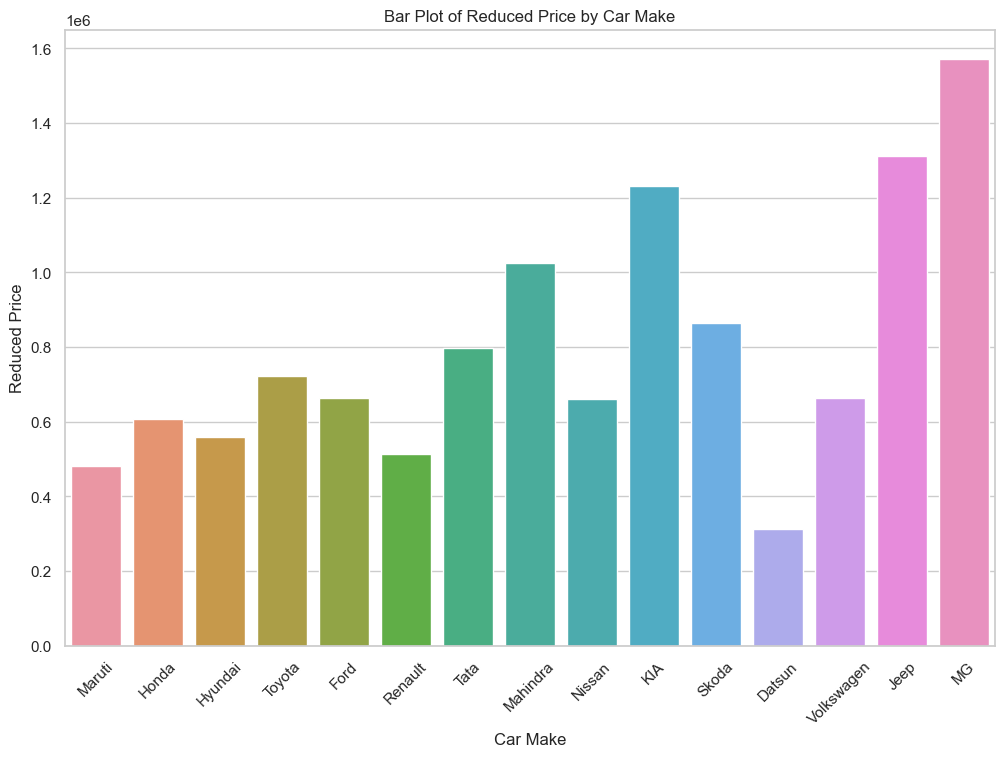

In [44]:
# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='reduced_price', data=df, ci=None)
plt.title('Bar Plot of Reduced Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Reduced Price')
plt.xticks(rotation=45)
plt.show()

##### Observations

1. The car companies such as MG has higher price followed by Jeep, KIA, Mahindra, Skoda and so on.
2. The cheapest car brands are datsun followed by Maruti, Renault, Hyundai, Honda and so on.
3. The cost of manufacturing, materials, labor, and other production-related expenses can influence the final retail price. Luxury brands often incur higher production costs, which can be reflected in the pricing of their vehicles.
4. This also brings us to a conclusion that the reason behind Maruti, Hyundai and honda being more frequent brands in the dataset is due to the fact that these brands are economical and can be afforded by most number of the consumers. 



##### 'Fuel_type' vs 'Price'

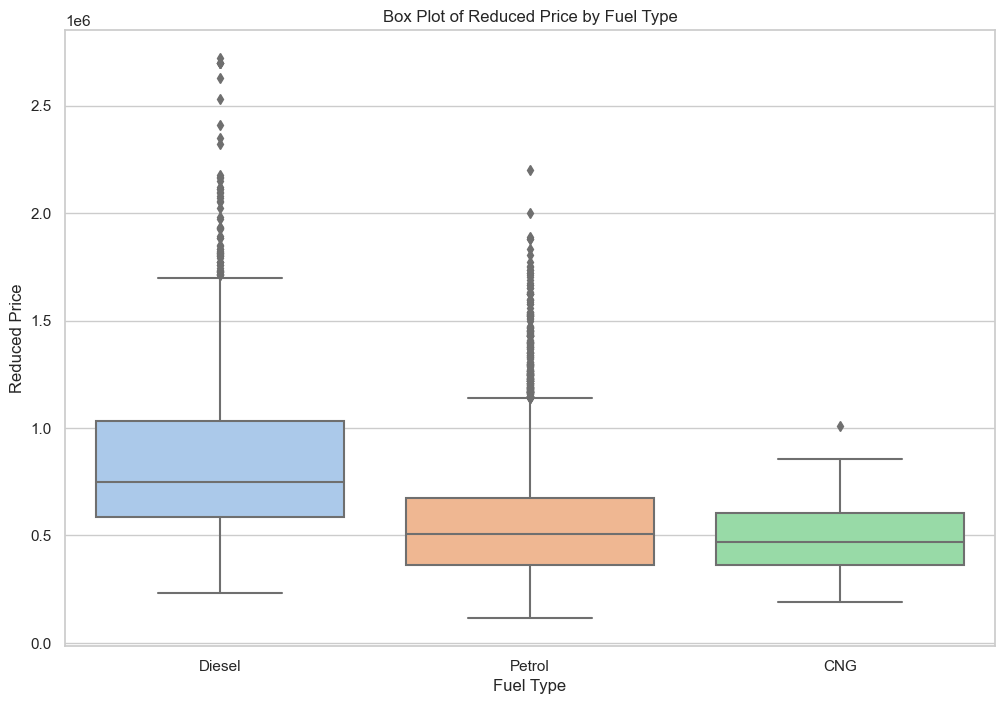

In [45]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel_type', y='reduced_price', data=df)
plt.title('Box Plot of Reduced Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Reduced Price')
plt.show()

##### Observations:

1. Diesel fuel_tpe vehicles are more expensive followed by petrol and CNG.
2. Diesel engines are generally more fuel-efficient than petrol engines, providing more kilometers per liter. The increased fuel efficiency can be an attractive feature for consumers, contributing to the higher demand and pricing of diesel cars.

#####  "City" vs 'Price'

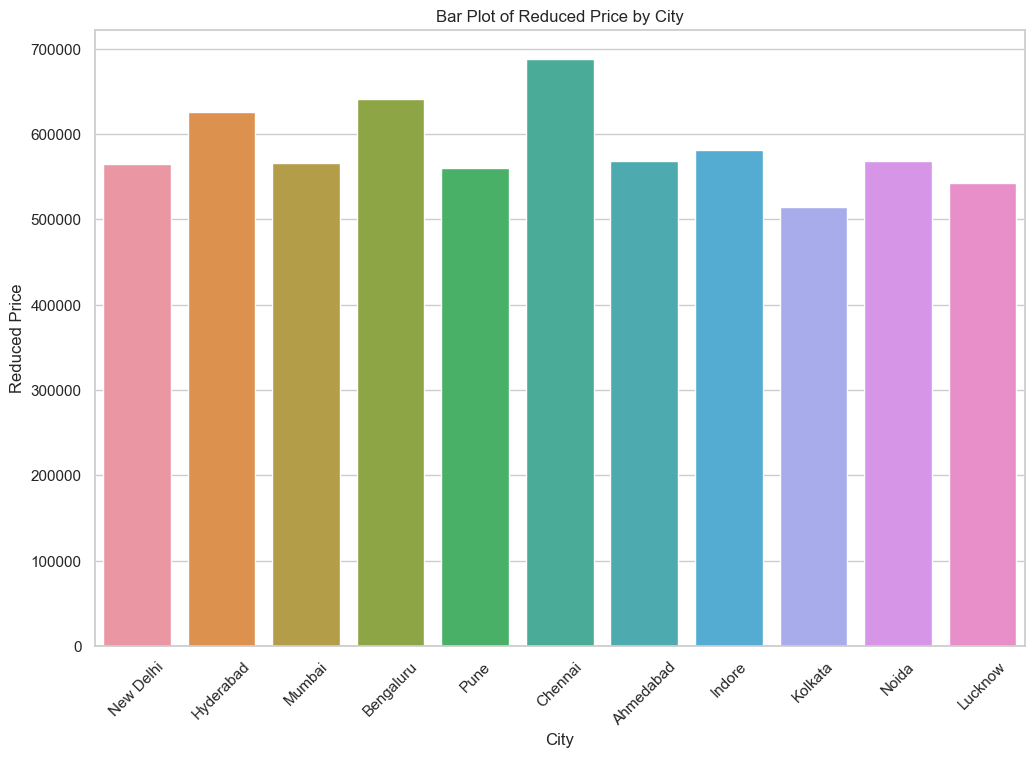

In [46]:
# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='reduced_price', data=df, ci=None)
plt.title('Bar Plot of Reduced Price by City')
plt.xlabel('City')
plt.ylabel('Reduced Price')
plt.xticks(rotation=45)
plt.show()

##### Observations:

1. All the cities have more or less the same prices. But the cities where the car prices are high Chennai followed by Bengaluru followed by Hyderabad.
2. Price of cars is lower in cities like Kolkata nad Indore.
3. Economic factors play a significant role in determining car prices. Cities with higher average incomes and a stronger economy tend to have higher car prices. Chennai, Bengaluru, and Hyderabad are major economic hubs with higher average incomes, potentially contributing to the higher car prices in these cities. 

##### Fuel Type vs Mileage

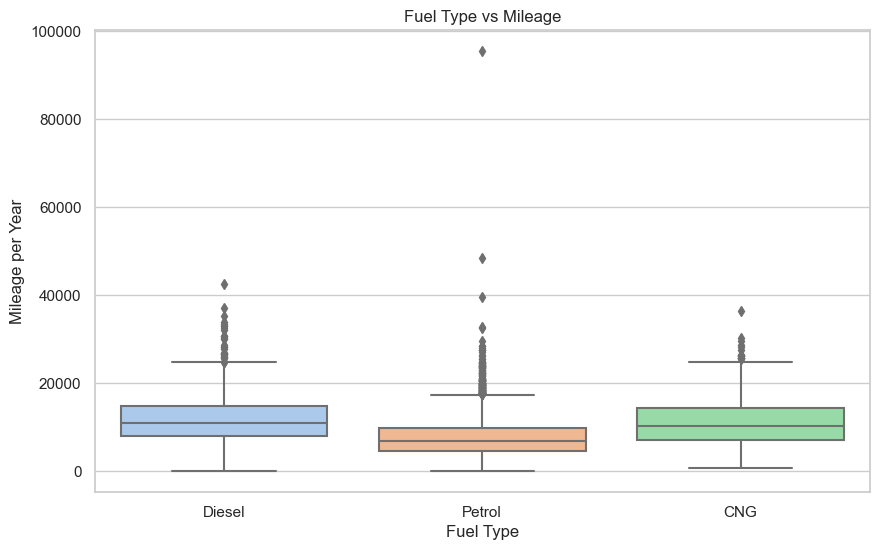

In [47]:
plt.figure(figsize=(10, 6))
# Create a box plot
sns.boxplot(x='fuel_type', y='mileage_per_year', data=df)

# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Mileage per Year')
plt.title('Fuel Type vs Mileage')

# Show the plot
plt.show()

##### Observations:

1. Diesel gives the higher mileage followed by CNG and petrol.
2. Diesel engines typically have higher energy content, and diesel fuel has a higher energy density compared to petrol. 

##### 3(v): Multivariate Analysis:

##### Visualize Make Model and Price

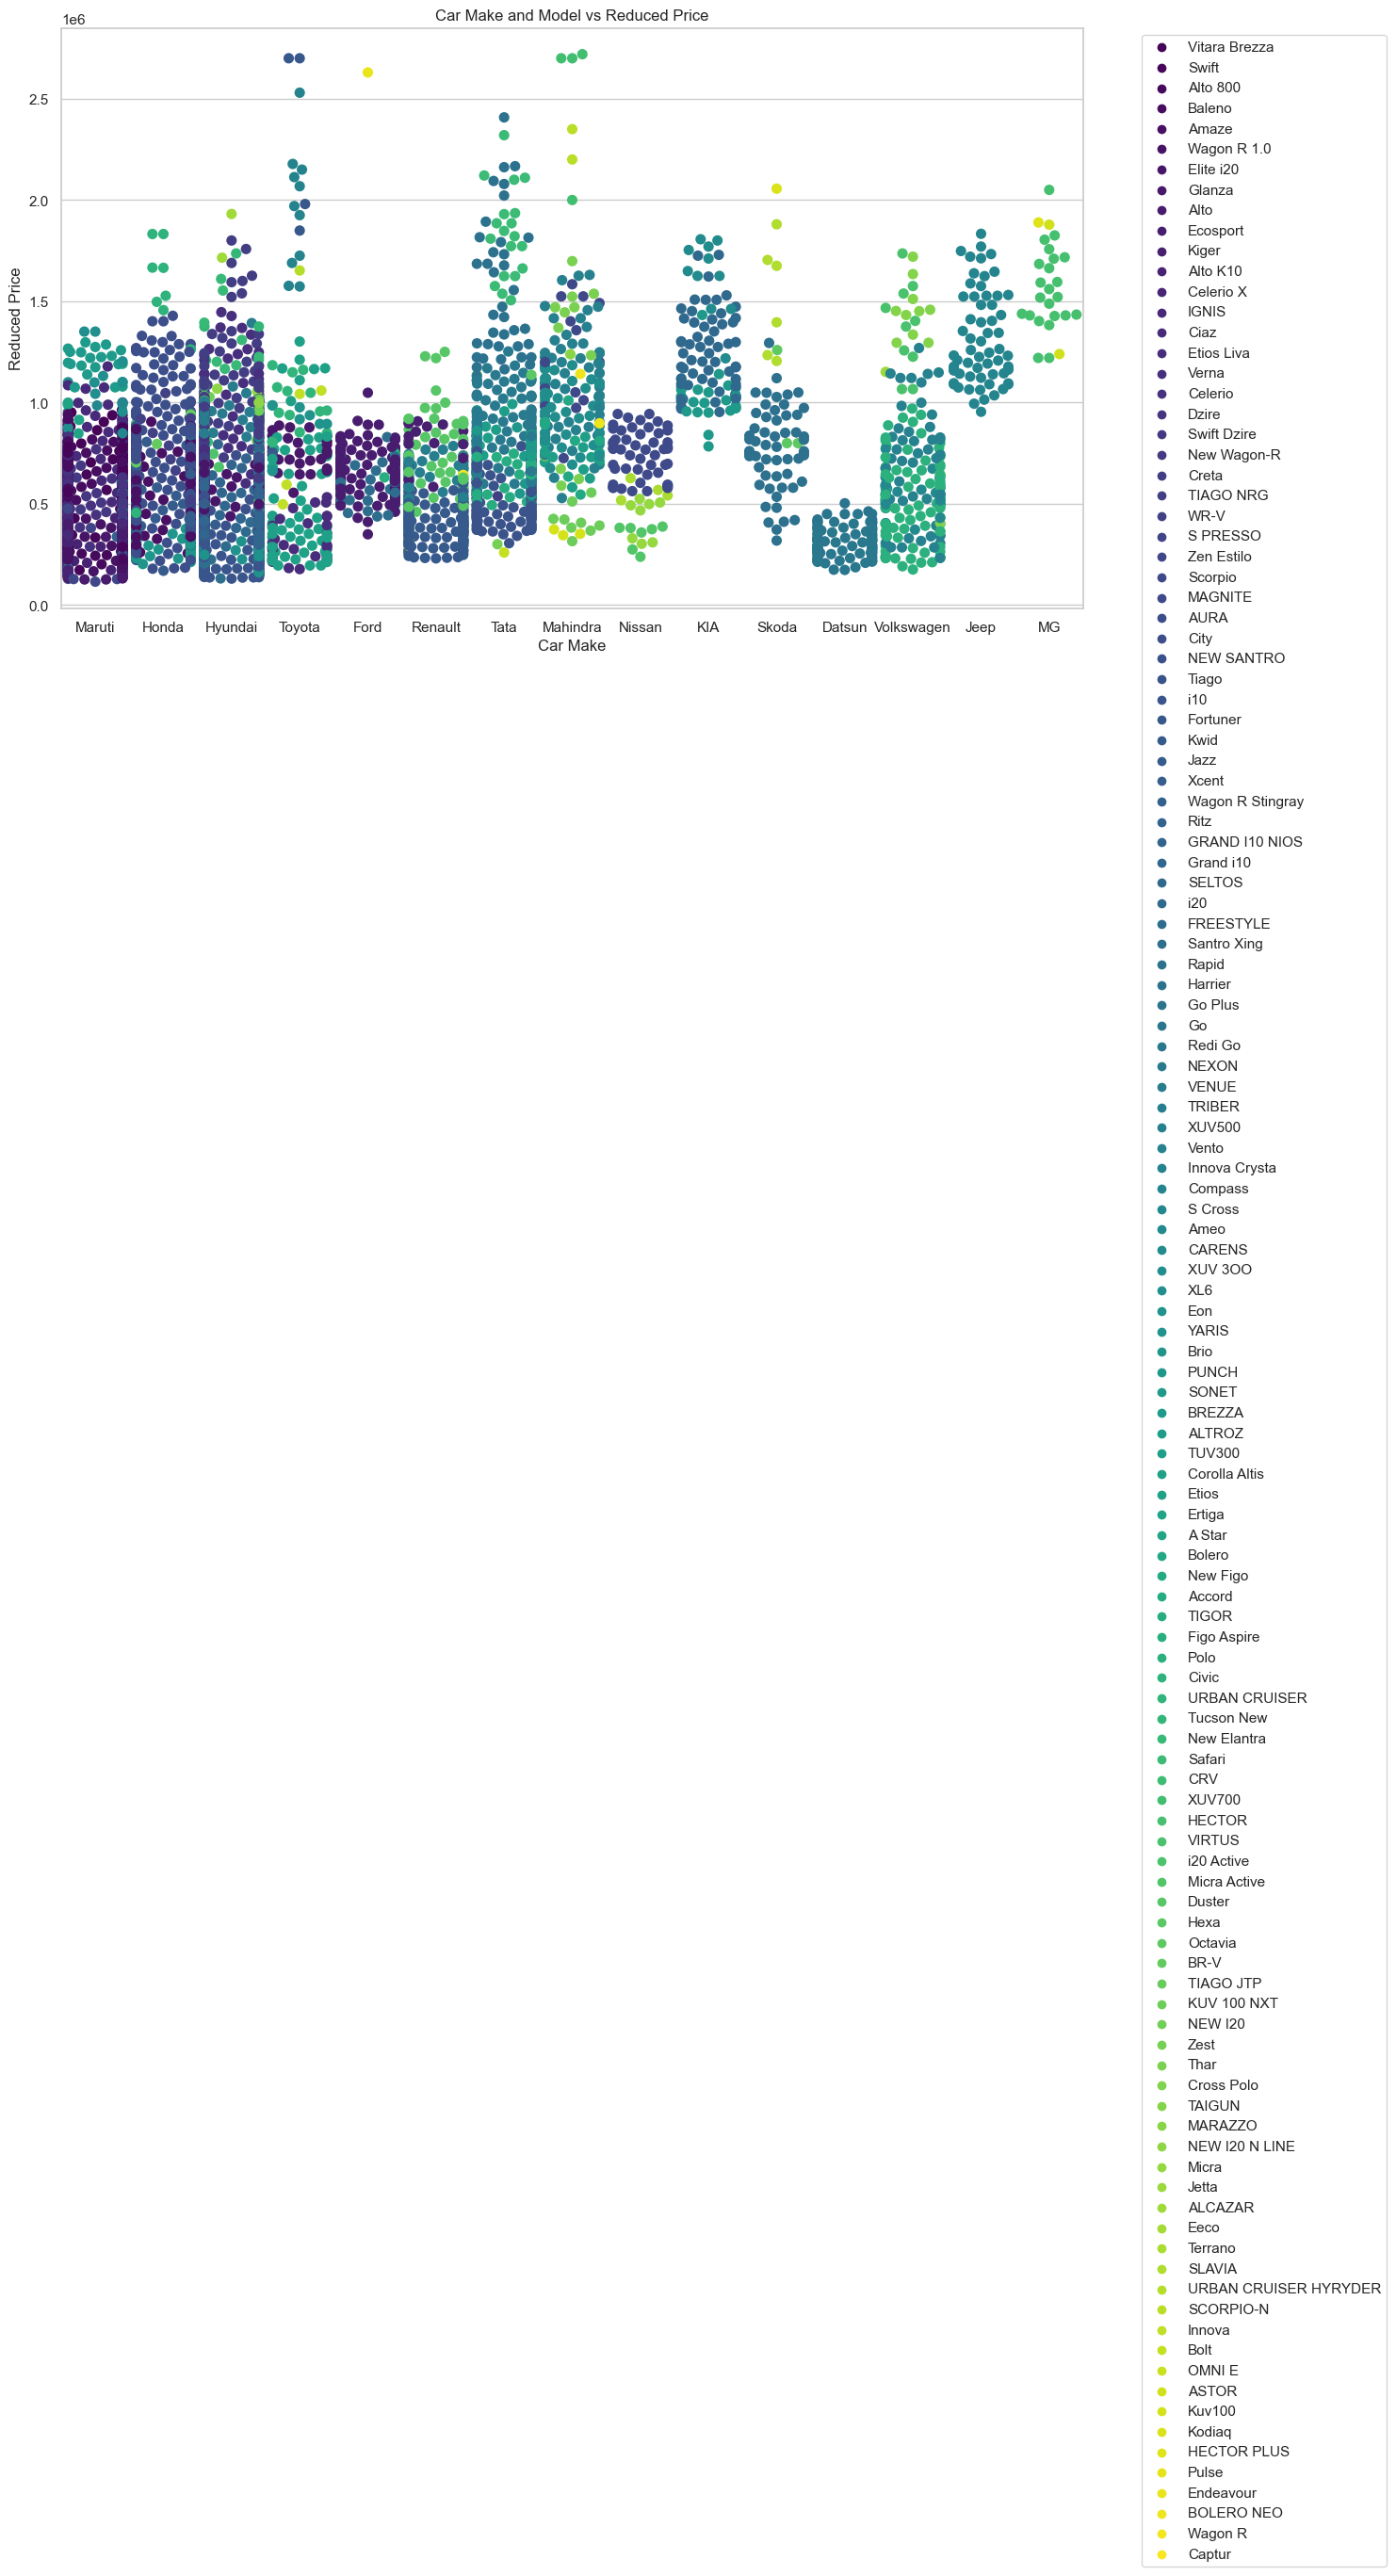

In [48]:
plt.figure(figsize=(14, 8))

# Create a swarm plot
sns.swarmplot(x='Make', y='reduced_price', hue='Model', data=df, palette='viridis', size=8)

# Add labels and title
plt.xlabel('Car Make')
plt.ylabel('Reduced Price')
plt.title('Car Make and Model vs Reduced Price')

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

##### Observations:

1. The insight from the visualization suggests that within each car make, there is a variation in prices among different car models. Some models within a make are more expensive, while others are less expensive.  This indicates that the specific model of a car within a particular make can significantly impact its price.

## ------------------------------------------------------------------------------------------------------------------------------------

#### 4. Data Transformation

##### 4.1 Transform 'ownership_status' column:

In [49]:
#check unique values
df['ownership_status'].value_counts()

ownership_status
1st Owner    5055
2nd Owner    1948
3rd Owner     207
4th Owner       2
Name: count, dtype: int64

In [50]:
# Mapping dictionary for replacement
ownership_mapping = {'1st Owner': 0, '2nd Owner': 1, '3rd Owner': 2, '4th Owner': 3}

# Replace values in the 'ownership_status' column
df['ownership_status'] = df['ownership_status'].replace(ownership_mapping)

# Display the modified DataFrame
print(df['ownership_status'].unique())



[0 1 2 3]


##### Observations:
1. The column 'ownership_status' has 4 unique values. 1st owner indicates that the vehicle had only 1 preceeding owner and 2 indicates that the vehicle had 2 preceeding owners and so on.
2. Based on the frequency distribution the values have been mapped to 1st Owner: 0, 2nd Owner: 1, 3rd Owner: 2 and 4th Owner: 3. 

##### 4.2 Transform 'Make' column

In [51]:
df['Make'].unique()

array(['Maruti', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault', 'Tata',
       'Mahindra', 'Nissan', 'KIA', 'Skoda', 'Datsun', 'Volkswagen',
       'Jeep', 'MG'], dtype=object)

In [52]:
df['Make'].value_counts()

Make
Maruti        2648
Hyundai       1738
Honda          876
Tata           456
Renault        348
Volkswagen     192
Mahindra       178
Ford           175
Toyota         174
Datsun         104
KIA             97
Nissan          71
Skoda           67
Jeep            62
MG              26
Name: count, dtype: int64

In [53]:
make_mapping = {
    'Maruti': 0,
    'Hyundai': 1,
    'Honda': 2,
    'Tata': 3,
    'Renault': 4,
    'Volkswagen': 5,
    'Mahindra': 6,
    'Ford': 7,
    'Toyota': 8,
    'Datsun': 9,
    'KIA': 10,
    'Nissan': 11,
    'Skoda': 12,
    'Jeep': 13,
    'MG': 14
}

# Replace 'Make' values with numeric values using the mapping
df['Make'] = df['Make'].replace(make_mapping)

df.head()


Year  Make          Model     trim transmission  kms_driven  \
0  2019     0  Vitara Brezza      VDI       Manual       55523   
1  2015     0          Swift  VDI ABS       Manual      117499   
2  2018     0          Swift      VXI       Manual       91534   
3  2019     0  Vitara Brezza      VDI       Manual       50767   
4  2015     0       Alto 800      LXI       Manual       35843   

   ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0                 0    Diesel          15327          819000         784000   
1                 0    Diesel           7351          419000         376000   
2                 1    Petrol           9951          537000         509000   
3                 0    Diesel          14975          819000         766000   
4                 2    Petrol           4594          235000         235000   

        City  car_age  depreciation_rate  mileage_per_year  
0  New Delhi        5           4.273504      11104.600000  
1  New Delhi        9          10.262530      13055.444444  
2  New Delhi        6           5.214153      15255.666667  
3  New Delhi        5           6.471306      10153.400000  
4  New Delhi        9           0.000000       3982.555556

##### Observations:
1. Based on the frequency count of the column 'Make'. The values have been mapped to numeric digits.
2. The more frequently a 'Make' appeared, the lower the assigned numeric value.
3. For example, 'Maruti' is the most common 'Make' in the dataset, it is assigned the numeric value 0. The next most common 'Make' is assigned the value 1, and so on. 

##### 4.3 Transform 'transmission' column

In [54]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [55]:
transmission_mapping = {'Manual': 0, 'Automatic': 1}

# Map 'Transmission' values to numeric values
df['transmission'] = df['transmission'].map(transmission_mapping)

# Display the updated DataFrame
df.head()


Year  Make          Model     trim  transmission  kms_driven  \
0  2019     0  Vitara Brezza      VDI             0       55523   
1  2015     0          Swift  VDI ABS             0      117499   
2  2018     0          Swift      VXI             0       91534   
3  2019     0  Vitara Brezza      VDI             0       50767   
4  2015     0       Alto 800      LXI             0       35843   

   ownership_status fuel_type  emi_per_month  original_price  reduced_price  \
0                 0    Diesel          15327          819000         784000   
1                 0    Diesel           7351          419000         376000   
2                 1    Petrol           9951          537000         509000   
3                 0    Diesel          14975          819000         766000   
4                 2    Petrol           4594          235000         235000   

        City  car_age  depreciation_rate  mileage_per_year  
0  New Delhi        5           4.273504      11104.600000  
1  New Delhi        9          10.262530      13055.444444  
2  New Delhi        6           5.214153      15255.666667  
3  New Delhi        5           6.471306      10153.400000  
4  New Delhi        9           0.000000       3982.555556

##### Observations:
1. It has two unique values.
2. Manual has been encoded to '0' and automatic has been encoded to '1'.

##### 4.4 Transform 'fuel_type' column

In [56]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [57]:
df['fuel_type'].value_counts()

fuel_type
Petrol    5701
Diesel    1071
CNG        440
Name: count, dtype: int64

In [58]:
oil_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}

# Map 'Oil_Type' values to numeric values
df['fuel_type'] = df['fuel_type'].map(oil_type_mapping)

# Display the updated DataFrame
df.head()


Year  Make          Model     trim  transmission  kms_driven  \
0  2019     0  Vitara Brezza      VDI             0       55523   
1  2015     0          Swift  VDI ABS             0      117499   
2  2018     0          Swift      VXI             0       91534   
3  2019     0  Vitara Brezza      VDI             0       50767   
4  2015     0       Alto 800      LXI             0       35843   

   ownership_status  fuel_type  emi_per_month  original_price  reduced_price  \
0                 0          1          15327          819000         784000   
1                 0          1           7351          419000         376000   
2                 1          0           9951          537000         509000   
3                 0          1          14975          819000         766000   
4                 2          0           4594          235000         235000   

        City  car_age  depreciation_rate  mileage_per_year  
0  New Delhi        5           4.273504      11104.600000  
1  New Delhi        9          10.262530      13055.444444  
2  New Delhi        6           5.214153      15255.666667  
3  New Delhi        5           6.471306      10153.400000  
4  New Delhi        9           0.000000       3982.555556

##### Observations:
1. 'Petrol', being the most common fuel type with the highest frequency (5675 occurrences), is assigned the numeric value 0.
2. 'Diesel', the second most common fuel type, is assigned the numeric value 1.
3. 'CNG', with the lowest frequency, is assigned the numeric value 2.

##### 4.4 Transform 'city' column

In [59]:
df['City'].value_counts()

City
New Delhi    1500
Bengaluru    1200
Noida         999
Mumbai        962
Hyderabad     898
Pune          400
Chennai       400
Kolkata       358
Lucknow       213
Indore        182
Ahmedabad     100
Name: count, dtype: int64

In [60]:
city_mapping = {
    'New Delhi': 0,
    'Bengaluru': 1,
    'Noida': 2,
    'Mumbai': 3,
    'Hyderabad': 4,
    'Pune': 5,
    'Chennai': 6,
    'Kolkata': 7,
    'Lucknow': 8,
    'Indore': 9,
    'Ahmedabad': 10
}

# Map 'City' values to numeric values
df['City'] = df['City'].map(city_mapping)

# Display the updated DataFrame
df.head()

Year  Make          Model     trim  transmission  kms_driven  \
0  2019     0  Vitara Brezza      VDI             0       55523   
1  2015     0          Swift  VDI ABS             0      117499   
2  2018     0          Swift      VXI             0       91534   
3  2019     0  Vitara Brezza      VDI             0       50767   
4  2015     0       Alto 800      LXI             0       35843   

   ownership_status  fuel_type  emi_per_month  original_price  reduced_price  \
0                 0          1          15327          819000         784000   
1                 0          1           7351          419000         376000   
2                 1          0           9951          537000         509000   
3                 0          1          14975          819000         766000   
4                 2          0           4594          235000         235000   

   City  car_age  depreciation_rate  mileage_per_year  
0     0        5           4.273504      11104.600000  
1     0        9          10.262530      13055.444444  
2     0        6           5.214153      15255.666667  
3     0        5           6.471306      10153.400000  
4     0        9           0.000000       3982.555556

##### Observations:

1. The 'city' column in the DataFrame has numeric representations based on the frequency of each city, with the most common city receiving the lowest numeric value. 
2. 'New Delhi', being the most common city with the highest frequency (1500 occurrences), is assigned the numeric value 0.
3. 'Bengaluru', the second most common city, is assigned the numeric value 1.
4. 'Noida' is assigned the numeric value 2, and so on.

##### 4.5 "Model" and "trim" column are yet to be transformed.

## ------------------------------------------------------------------------------------------------------------------------------------

#### 5. Outlier Detection
Two approches have been used to find out outliers in the data.
1. Inter quartile range method
2. Box plot

##### 5.1 IQR method

In [61]:
columns = ['kms_driven', 'emi_per_month', 'original_price', 
               'reduced_price', 'depreciation_rate', 'mileage_per_year']
summary_statistics = df[columns].describe()
summary_statistics

kms_driven  emi_per_month  original_price  reduced_price  \
count  7.212000e+03    7212.000000    7.212000e+03   7.212000e+03   
mean   5.453791e+04   11587.683722    6.366254e+05   5.896207e+05   
std    3.132042e+04    5756.163935    3.259237e+05   3.072358e+05   
min    0.000000e+00    2248.000000    1.150000e+05   1.150000e+05   
25%    3.087425e+04    7816.250000    4.170000e+05   3.850000e+05   
50%    5.230150e+04   10586.500000    5.840000e+05   5.340000e+05   
75%    7.591750e+04   14096.000000    7.790000e+05   7.142500e+05   
max    1.050066e+06   51773.000000    2.742000e+06   2.720000e+06   

       depreciation_rate  mileage_per_year  
count        7212.000000       7212.000000  
mean            7.412257       8441.057070  
std             4.901000       4900.539487  
min             0.000000          0.000000  
25%             3.890160       5027.772436  
50%             7.086328       7500.850000  
75%            10.207940      10788.716667  
max            30.144404      95460.545455

In [62]:
def find_outliers(df, columns):
    outlier_info = {}

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = outliers.sum()

        outlier_info[column] = {
            'outlier_count': outlier_count,
            'IQR': IQR,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return outlier_info

# Specify the columns for which you want to find outliers
outlier_columns = ['kms_driven', 'emi_per_month', 'original_price', 
                   'reduced_price', 'depreciation_rate', 'mileage_per_year']

# Assuming you have a DataFrame named 'df' with your dataset
outlier_info = find_outliers(df, outlier_columns)

for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"Count of outliers: {info['outlier_count']}")
    print(f"IQR: {info['IQR']}")
    print(f"Q1: {info['Q1']}")
    print(f"Q3: {info['Q3']}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}\n")



Column: kms_driven
Count of outliers: 7
IQR: 45043.25
Q1: 30874.25
Q3: 75917.5
Lower Bound: -36690.625
Upper Bound: 143482.375

Column: emi_per_month
Count of outliers: 296
IQR: 6279.75
Q1: 7816.25
Q3: 14096.0
Lower Bound: -1603.375
Upper Bound: 23515.625

Column: original_price
Count of outliers: 291
IQR: 362000.0
Q1: 417000.0
Q3: 779000.0
Lower Bound: -126000.0
Upper Bound: 1322000.0

Column: reduced_price
Count of outliers: 329
IQR: 329250.0
Q1: 385000.0
Q3: 714250.0
Lower Bound: -108875.0
Upper Bound: 1208125.0

Column: depreciation_rate
Count of outliers: 135
IQR: 6.317779325440254
Q1: 3.8901601830663615
Q3: 10.207939508506616
Lower Bound: -5.586508805094018
Upper Bound: 19.684608496666996

Column: mileage_per_year
Count of outliers: 212
IQR: 5760.944230769232
Q1: 5027.772435897436
Q3: 10788.716666666667
Lower Bound: -3613.6439102564127
Upper Bound: 19430.133012820515



#### 5. 2 Box plot method:

In [63]:
# List of car-related columns for which you want to create box plots
car_columns = [ 'kms_driven', 'emi_per_month', 'original_price', 
               'reduced_price', 'depreciation_rate', 'mileage_per_year']

# Loop through the car-related columns and create a box plot for each one
for column in car_columns:
    fig = px.box(df, y=column)
    fig.update_layout(
        autosize=False,
        width=800,
        height=600,
        title='Box plot of ' + column,
        xaxis_title=column,
        yaxis_title='Value'
    )

    # Show the plot
    fig.show()


##### Observations:

Outlier analysis has been performed on all the numeric features of the dataset. Both the approches show us that the data indeed has many outliers. The value which resides below the lower bound and the values that resides above the upper bound are considered to be outliers. Based on the calculations made by the Inter quartile range method and box plot method the number of outliers in each column is:

1. Column: kms_driven: Count of outliers: 7
2. Column: emi_per_month: Count of outliers: 296
3. Column: original_price: Count of outliers: 291
4. Column: reduced_price: Count of outliers: 326
5. Column: depreciation_rate: Count of outliers: 136
6. Column: mileage_per_year: Count of outliers: 312

The data is moderately skewed and the whisker for "kms-driven" looks small and compressed as a result of outliers. The outliers present in the data needs to be addressed using suitable techniques. 

## -------------------------------------------------------------------------------------------------------------------------------------

#### 6. Outlier Treatment (Logarithmic Transformation):

In [64]:
# Columns which need to be transformed
columns = ['kms_driven', 'emi_per_month', 'original_price', 
           'reduced_price', 'depreciation_rate', 'mileage_per_year']

def log_trans(df, columns):
    # Loop through the function to access each column
    for column in columns:
        # Use map and lambda to apply the log function to the values
        df[column] = df[column].map(lambda i: np.log(i) if i > 0 else 0)

    return df


df = log_trans(df, columns)

# Print skewness after transformation
skewness_after = df[columns].skew()
print("Skewness after transformation:")
print(skewness_after)
print('Shape of dataset:', df.shape)



Skewness after transformation:
kms_driven          -1.602158
emi_per_month       -0.113804
original_price      -0.104060
reduced_price       -0.058605
depreciation_rate   -0.888561
mileage_per_year    -1.011164
dtype: float64
Shape of dataset: (7212, 15)


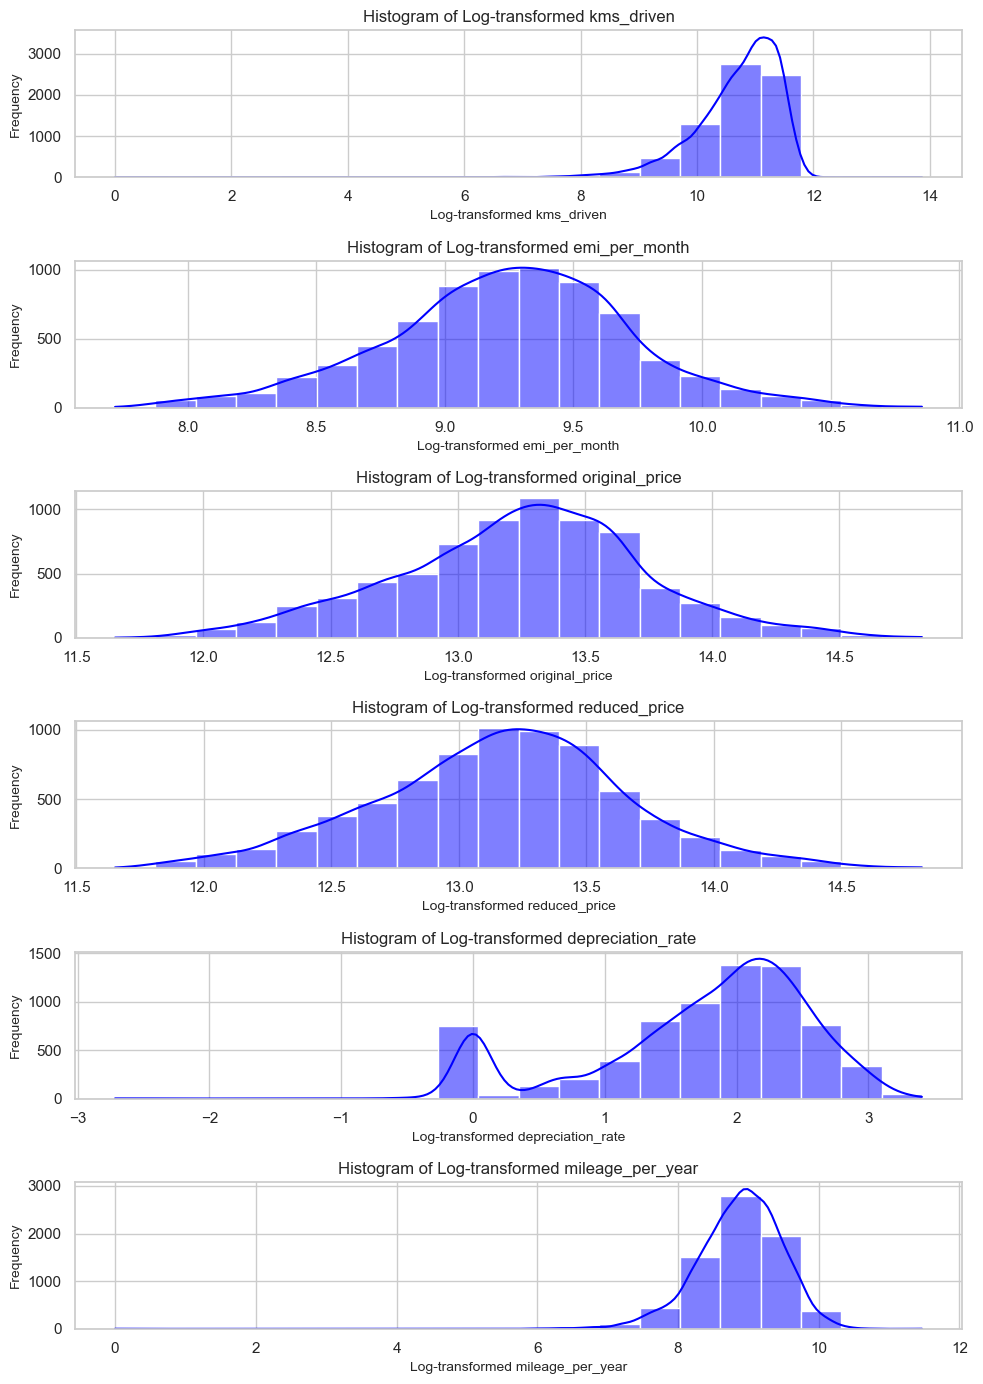

In [65]:
import warnings
warnings.filterwarnings('ignore')

# Columns which have been transformed
transformed_columns = ['kms_driven', 'emi_per_month', 'original_price', 
                        'reduced_price', 'depreciation_rate', 'mileage_per_year']

# Create subplots
fig, axes = plt.subplots(nrows=len(transformed_columns), ncols=1, figsize=(10, 14))

# Loop through columns and plot histograms
for i, column in enumerate(transformed_columns):
    sns.histplot(df[column], kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f'Histogram of Log-transformed {column}', fontsize=12)
    axes[i].set_xlabel(f'Log-transformed {column}', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

In [66]:
# Loop through the car-related columns and create a box plot for each one
for column in car_columns:
    fig = px.box(df, y=column)
    fig.update_layout(
        autosize=False,
        width=800,
        height=600,
        title='Box plot of ' + column,
        xaxis_title=column,
        yaxis_title='Value'
    )

    # Show the plot
    fig.show()


In [67]:
df.head()

Year  Make          Model     trim  transmission  kms_driven  \
0  2019     0  Vitara Brezza      VDI             0   10.924553   
1  2015     0          Swift  VDI ABS             0   11.674185   
2  2018     0          Swift      VXI             0   11.424466   
3  2019     0  Vitara Brezza      VDI             0   10.835002   
4  2015     0       Alto 800      LXI             0   10.486904   

   ownership_status  fuel_type  emi_per_month  original_price  reduced_price  \
0                 0          1       9.637371       13.615839      13.572164   
1                 0          1       8.902592       12.945626      12.837344   
2                 1          0       9.205428       13.193753      13.140203   
3                 0          1       9.614137       13.615839      13.548937   
4                 2          0       8.432506       12.367341      12.367341   

   City  car_age  depreciation_rate  mileage_per_year  
0     0        5           1.452434          9.315115  
1     0        9           2.328499          9.476961  
2     0        6           1.651377          9.632706  
3     0        5           1.867378          9.225564  
4     0        9           0.000000          8.289679

##### Observations:

1. Prior to logarithmic transformation it can be observed from the histograms plotted, that the data was right skewed. The skewness recorded indicates that the data was moderately right skewed. 
2. Logarthmic Transformation has been applied and it can be observed from the histograms that the distribution of the data has become more symmetric and looks more like a normal distribution. (for example: the attribute 'kms_driven' had a skewness score of "4.76" prior to transformation and the score obtained after log operation is "-1.59"). The log-transformation did slightly skewed the distribution towards left. But, overall it looks good.

## ------------------------------------------------------------------------------------------------------------------------------------

#### 7. Correlation Analysis:

##### 7.1 Heatmap

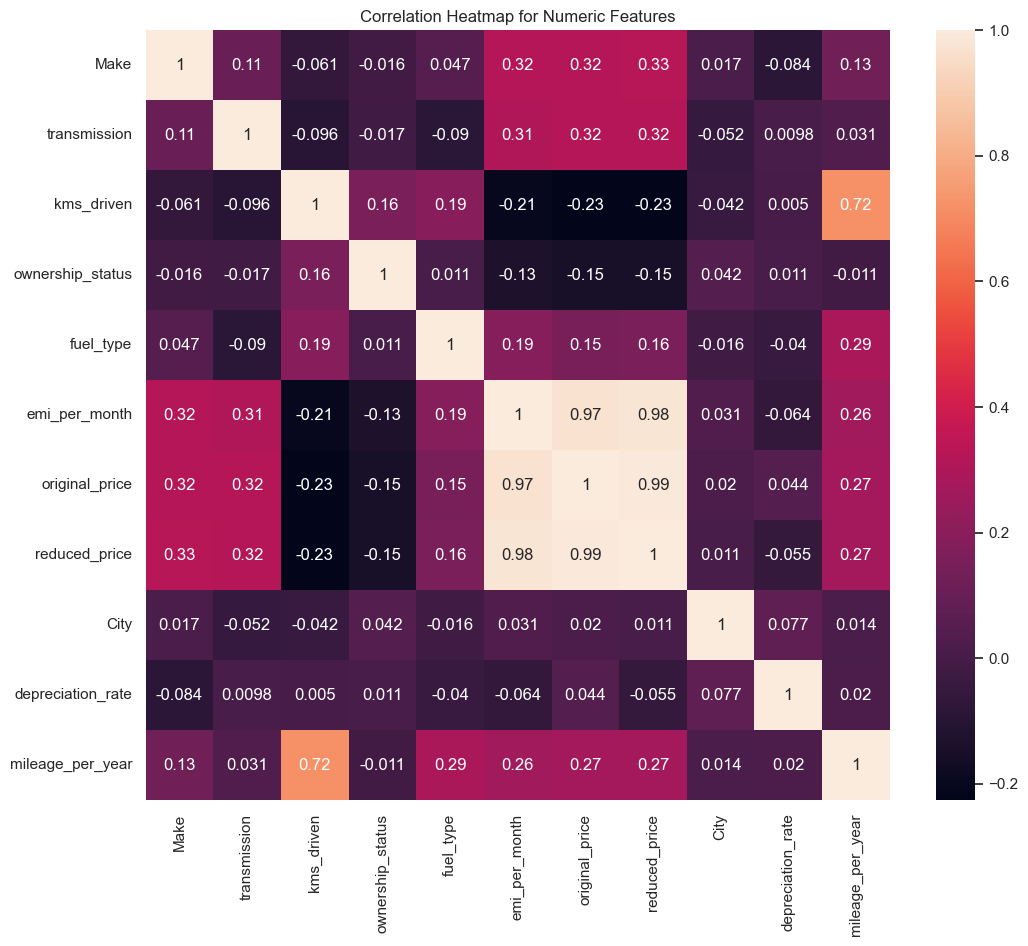

In [68]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True)

# Add title
plt.title("Correlation Heatmap for Numeric Features")

# Show the plot
plt.show()

##### 7.2 Recursive Feature Elimination:

In [69]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['reduced_price','Model', 'trim'])  # Features
y = df['reduced_price']  # Target

# Create an estimator (e.g., RandomForestRegressor)
estimator = RandomForestRegressor(n_estimators=100)

# Initialize RFE with the estimator
selector = RFE(estimator, n_features_to_select=1, step=1)

# Fit RFE to the data
selector.fit(X, y)

# Get the ranking of features
feature_ranking = selector.ranking_

# Create a DataFrame to display feature names and their rankings
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking in ascending order
ranking_df = ranking_df.sort_values(by='Ranking')

# Display the sorted DataFrame
print(ranking_df)


              Feature  Ranking
7      original_price        1
6       emi_per_month        2
10  depreciation_rate        3
9             car_age        4
3          kms_driven        5
0                Year        6
11   mileage_per_year        7
8                City        8
1                Make        9
4    ownership_status       10
5           fuel_type       11
2        transmission       12


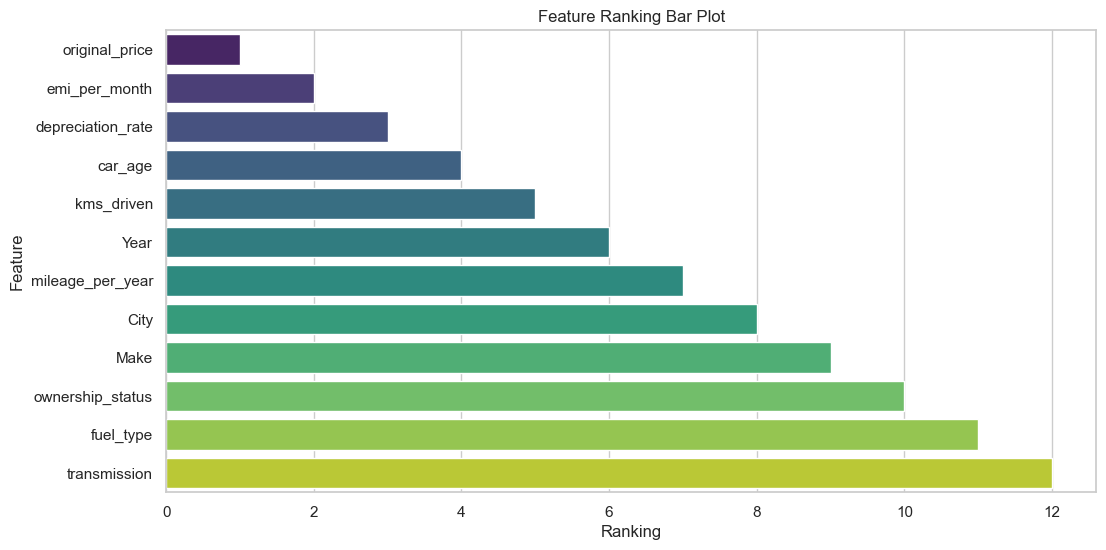

In [70]:
# Plot a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Ranking', y='Feature', data=ranking_df, palette='viridis')
plt.title("Feature Ranking Bar Plot")
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.show()

##### Observations:

1. A heatmap has been plotted in order to understand the correlation among the variables w.r.t target variable. From the heatmap it can be observed that the features 'emi_per_month' and 'original_price' have highest positive correlation w.r.t. target variable. Features like ' Make', 'transmission' and 'model' have moderate positive corelation w.r.t. target variable. Features like 'kms_driven' and 'ownership_status' have negative correlation w.r.t target variable.

2. Recursive feature elimination has also been performed and a bar plot has been plotted showing the rank of most to least important features. And, it can be observed that original_price has the highest ranking of 1 followed by "emi_per_month", depreciation_rate, car_age, year and so on.

3. Based on this analysis few important decisions have been made on which attributes to choose for data modelling.

4. The attributes 'Emi_per_month' and 'original_price' will not be included. The reason behind this is, these features shows extreme correlation with target variable. Having such a huge correlation can impact the performance of the model. There might be an issue of data leakage. so as a result these features will not used for prediction. Moreover, the columns 'transmission' and 'make' have absolutely same correlation. So we decide to proceed with only one feature(Make) and drop the other redundant feature(Transmission).


## -------------------------------------------------------------------------------------------------------------------------------------

#### 8.  Train-Test split and Additional data encoding:

In [71]:
x = df[["Year","Make","Model","trim","kms_driven","fuel_type", "City","car_age", "depreciation_rate", 'mileage_per_year','ownership_status']]
y = df['reduced_price']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

#Target Encoding on Training Set for 'trim'
encoder_trim = ce.TargetEncoder(cols=['trim'])
X_train_encoded = encoder_trim.fit_transform(X_train, y_train)

# Apply the Same Encoding to Test Sets for 'trim'
X_test_encoded = encoder_trim.transform(X_test)

# Target Encoding on Training Set for 'model'
encoder_model = ce.TargetEncoder(cols=['Model'])
X_train_encoded_model = encoder_model.fit_transform(X_train_encoded, y_train)

# Apply the Same Encoding to Validation and Test Sets for 'model'
X_test_encoded_model = encoder_model.transform(X_test_encoded)

In [73]:
X_train = X_train_encoded_model 
X_test = X_test_encoded_model

##### Observations:
1. Train-Test split has been performed by dividing the data to 80% Train and 20% test. The data has been shuffled by setting the shuffle parameter to True. It shuffles the data prior to train test split so that the model is exposed to all sorts of data.
2. The columns 'Make' and 'Trim' have been encoded after train-test-split using the target encoder.
3. Target encoding is done after train-test-split to avoid any information leakage from the test set into the encoding process.This approach helps maintain the integrity of the test set.


## --------------------------------------------------------------------------------------------------------------------------------------

#### 9. Data Modelling:

##### 9. 1 Decision-Tree (Baseline model)

In [75]:
from sklearn.model_selection import cross_val_score, KFold
# Create a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Evaluate the model using k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
cv_results_train = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_results_test = cross_val_score(dt_model, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')

# Calculate R-squared for comparison
r2_train = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='r2').mean()
r2_test = cross_val_score(dt_model, X_test, y_test, cv=kf, scoring='r2').mean()

# Display results
print(f'Cross-validated Mean Squared Error (Train): {abs(cv_results_train.mean())}')
print(f'Cross-validated Mean Squared Error (Test): {abs(cv_results_test.mean())}')
print(f'Cross-validated R-squared (Train): {r2_train}')
print(f'Cross-validated R-squared (Test): {r2_test}')


Cross-validated Mean Squared Error (Train): 0.02436003332271239
Cross-validated Mean Squared Error (Test): 0.05730791448582166
Cross-validated R-squared (Train): 0.8999207951280888
Cross-validated R-squared (Test): 0.7499212394091679


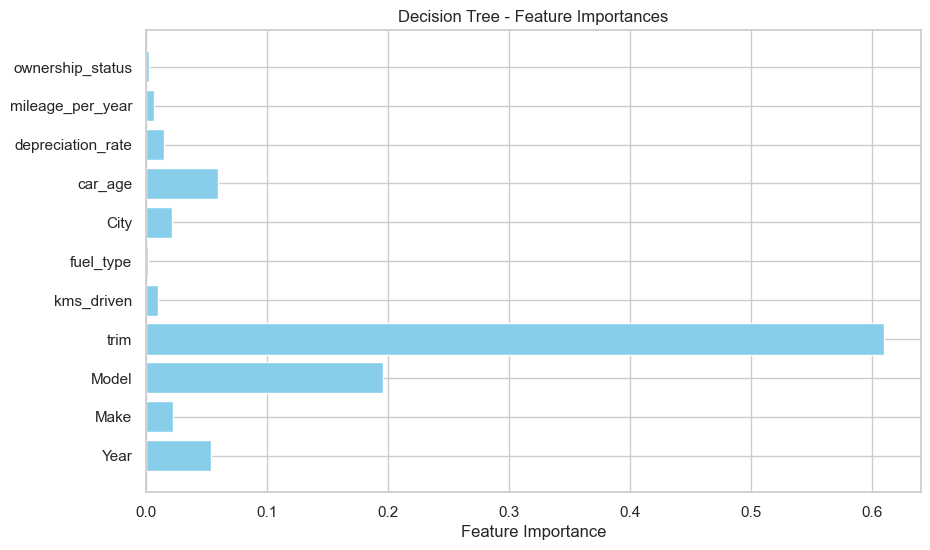

In [76]:
# Fit the model
dt_model.fit(X_train, y_train)

# Display important features
feature_importance = dt_model.feature_importances_
features = X_train.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree - Feature Importances')
plt.show()

##### Observations:

1. A baseline model Decision-tree has been trained.
2. k-fold cross-validation with 5 folds have been used in order to train each fold.
3. The model was evaluated using metrics such as MSE, r2 score. 
4. Based on the results it can be observed that the model overfits. The r2 square on train set is 0.89 while the r2 square on test set is 0.77. It represents that the model is learning too much about the training data and is not generalising well to unseen data.
4. Lastly, important features have been plotted using this model and it can be observed that the features 'Trim' followed by 'Model' and 'car_age' have higher importance and contribute the most to prediction. 

##### 9.2 Random Forest- No hyperparameter tuning

In [77]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Perform k-fold cross-validation
cv_results_train = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
cv_results_test = cross_val_score(rf_model, X_test, y_test, cv=5, scoring=make_scorer(mean_squared_error))

# Calculate R-squared for comparison
r2_train = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=make_scorer(r2_score)).mean()
r2_test = cross_val_score(rf_model, X_test, y_test, cv=5, scoring=make_scorer(r2_score)).mean()

# Display results
print(f'Cross-validated Mean Squared Error (Train): {cv_results_train.mean()}')
print(f'Cross-validated Mean Squared Error (Test): {cv_results_test.mean()}')
print(f'Cross-validated R-squared (Train): {r2_train}')
print(f'Cross-validated R-squared (Test): {r2_test}')


Cross-validated Mean Squared Error (Train): 0.01223228345054145
Cross-validated Mean Squared Error (Test): 0.02768247428076116
Cross-validated R-squared (Train): 0.9497934391562417
Cross-validated R-squared (Test): 0.8800486133937792


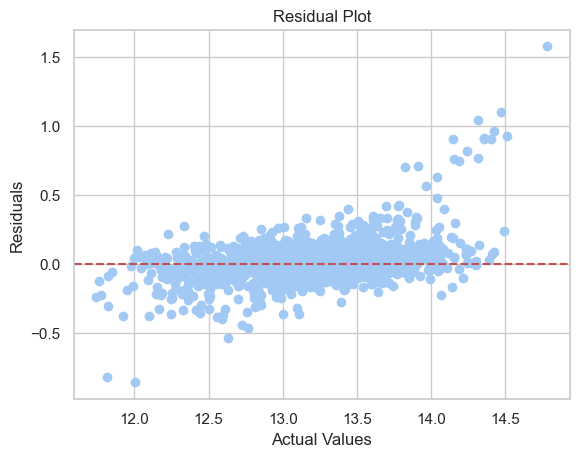

In [78]:
# Fit model on the full training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)

residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


##### Observations:

1. R2 square of model is approximately 0.9489, indicating that the model explains a large portion of the variance in the training data.
2. In the test set, the model achieves a cross-validated r2 square of approximately 0.8930. This suggests that the model's performance is also good on unseen data.
3. In the training as well as test set, the model achieves a cross-validated MSE of approximately 0.0123 and 0.024 respectively. Lower MSE values indicate better model performance, suggesting that the model's predictions are, on average, close to the actual values in the training set.
4. The residual plot also indicates that a mix of positive and negative residuals scattered around the zero line suggests that, on average, the model is making balanced predictions. The model is not consistently overestimating or underestimating the response variable.

#### Random Forest with hyper parameter tuning

In [79]:
# Create a Random Forest Regressor model
rfh_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(10, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring={'mse': make_scorer(mean_squared_error), 'r2': make_scorer(r2_score)},
    cv=5,
    refit='mse', 
    random_state=42,
    n_jobs=-1
)
# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the model with the best hyperparameters on the training set
y_train_pred = random_search.best_estimator_.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Print results on the training set
print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'R-squared on Training Set: {r2_train}')

# Evaluate the model with the best hyperparameters on the test set
y_test_pred = random_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Best Hyperparameters:
{'n_estimators': 178, 'min_samples_split': 13, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'max_depth': None}
Mean Squared Error on Training Set: 0.01797796280255776
R-squared on Training Set: 0.9262099768928996
Mean Squared Error on Test Set: 0.031669327316858224
R-squared on Test Set: 0.8633310432032946


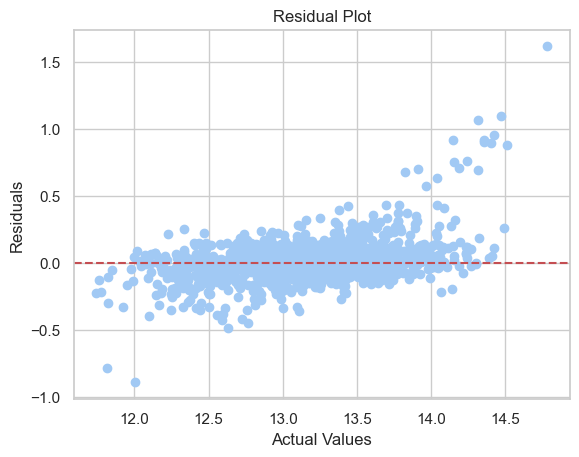

In [80]:
# Fit model on the full training set
rfh_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rfh_model.predict(X_test)

residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


###### Observations:
1. The model, with the tuned hyperparameters, performs well on both the training and test sets.
2. The R-squared values suggest that a significant portion of the variability in the dependent variable is captured by the model.
3. The difference between training and test MSE is relatively small, indicating good generalization. 
4. There is a decrease in the results of R2 square for both train(0.92) and test(0.86) set because of hyper parameter tuning as compared to the previous model with no hyper parameter tuning.

#### XG boost - No hyper parameter tuning:

In [81]:
# Create XGBoost Regressor model
xgboost_model = xgb.XGBRegressor()

# Perform k-fold cross-validation for Mean Squared Error
cv_results_train = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
cv_results_test = cross_val_score(xgboost_model, X_test, y_test, cv=5, scoring=make_scorer(mean_squared_error))

# Calculate R-squared for comparison
r2_train = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring=make_scorer(r2_score)).mean()
r2_test = cross_val_score(xgboost_model, X_test, y_test, cv=5, scoring=make_scorer(r2_score)).mean()

# Display results
print(f'Cross-validated Mean Squared Error (Train): {cv_results_train.mean()}')
print(f'Cross-validated Mean Squared Error (Test): {cv_results_test.mean()}')
print(f'Cross-validated R-squared (Train): {r2_train}')
print(f'Cross-validated R-squared (Test): {r2_test}')

Cross-validated Mean Squared Error (Train): 0.008267627926342952
Cross-validated Mean Squared Error (Test): 0.022179868059933768
Cross-validated R-squared (Train): 0.96601757546728
Cross-validated R-squared (Test): 0.90467055413871


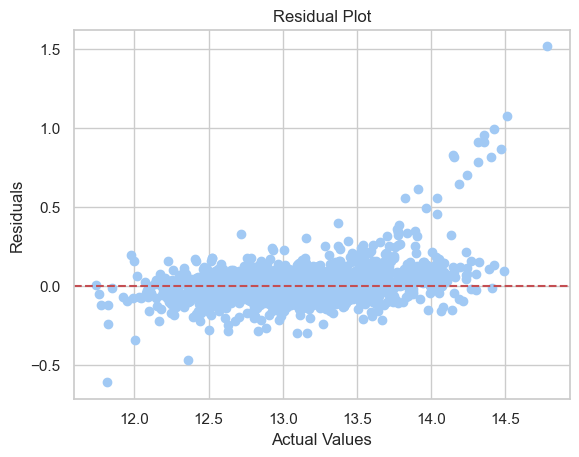

In [82]:
# Fit model on the full training set
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = xgboost_model.predict(X_test)

residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


##### Observations:

1. The XGBoost regressor, under cross-validation, performs exceptionally well on both the training and test sets.
2. The low cross-validated mean squared error on both the training and test sets suggests that the model makes accurate predictions with small errors.
3. The high cross-validated R-squared values indicate that a substantial portion of the variability in the dependent variable is captured by the model.
4. This is by far the best model with relatively higher training(0.96) and testing(0.91) accuracy. The model generalizes well to unseen data.

#### Xg-Boost with hyper parameter tuning:

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the hyperparameter grid for classification
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    # Add other parameters specific to classification if needed
}

# Create XGBoost Regressor model
xgboost_model_hyper = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Use the best hyperparameters to create a new XGBoost model
best_xgboost_model = xgb.XGBRegressor(**best_params)

# Fit the model to the training data
best_xgboost_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_xgboost_model.predict(X_train)

# Make predictions on the test set
y_pred_test = best_xgboost_model.predict(X_test)

# Calculate and display the performance metrics on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate and display the performance metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Display results
print(f'Best Hyperparameters: {best_params}')

print("Training Set Metrics:")
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

print("\nTest Set Metrics:")
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7}
Training Set Metrics:
Mean Squared Error: 0.0037777740668821446
R-squared: 0.9844942367080113

Test Set Metrics:
Mean Squared Error: 0.019169425419771836
R-squared: 0.9172743598782455


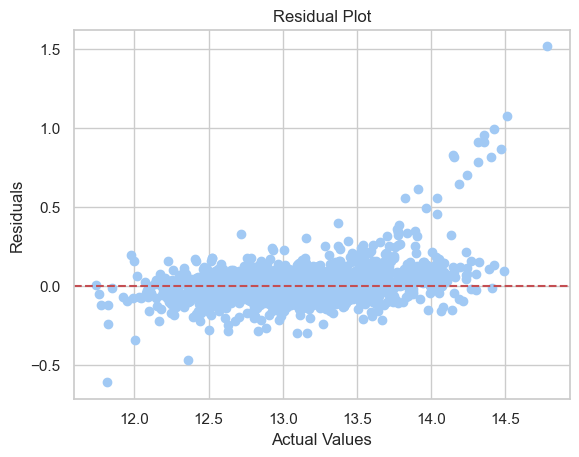

In [84]:
# Fit model on the full training set
xgboost_model_hyper.fit(X_train, y_train)

# Predict on the test set
y_test_pred = xgboost_model.predict(X_test)
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


##### Observations:
1. Best Hyperparameters: Learning Rate: 0.1, Max Depth: 7
2. The model seems to be performing exceptionally well, both on the training and test sets.
3. The low MSE values indicate that the model's predictions are close to the actual values, minimizing errors.
4. The high R-squared values suggest that the model captures a significant amount of variability in the target variable, demonstrating good predictive capability.
5. The model appears to generalize well to new data, as evidenced by the similar performance metrics on the test set compared to the training set.
6. This is the best model out of all the models discusses with a training r2 square of 98% and testing r2_square of 91%.

#### Comparision table:

In [86]:
models_results = [
    {'Model': 'Decision tree', 'MSE_test': 0.05, 'R2_test': 0.74},
    {'Model': 'Random forest', 'MSE_test':0.02, 'R2_test': 0.88},
    {'Model': 'Random forest (hyper parameter tuning)', 'MSE_test':0.03, 'R2_test': 0.86},
    {'Model': 'xg boost', 'MSE_test':0.02, 'R2_test': 0.90},
    {'Model': 'xg boost (hyper parameter tuning)', 'MSE_test':0.01, 'R2_test': 0.91}
    
    # Add results for other models
]

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(models_results)

# Display the table
results_df

Model  MSE_test  R2_test
0                           Decision tree      0.05     0.74
1                           Random forest      0.02     0.88
2  Random forest (hyper parameter tuning)      0.03     0.86
3                                xg boost      0.02     0.90
4       xg boost (hyper parameter tuning)      0.01     0.91

#### 10. Conclusion:

The project stands by all the claims it made. This project aimed to understand the market trend analysis on used cars, which was successfully achieved by performing an extensive EDA. The project's second objective was to build a robust model to predict the prices of used cars. To achieve this, the data underwent pre-processing, and feature engineering was performed to extract the most essential features for prediction. Moreover, the data was encoded using the proper encoding methods, such as the Label and Target encoders. At each step, we ensured no data leakage from the test set. Lastly, a few robust machine learning models have been created, and from the results, it can be interpreted that xg-boost with hyperparameter tuning yielded the best results with 93% r2 square and 0.01 MSE.

As a part of future work, there are certain aspects we need to work on. For example, the attributes ownership_status and city were not interpreted well by any machine learning model. In real life, these two factors play an essential role in influencing the price of the car. This underlying issue needs to be investigated. Additionally, we can explore more aspects of this project, such as performing customer segmentation and geo-location analysis.


#### 11. References:

1. RITHP. (2023, January 16). Optimizing XGBoost: A Guide to Hyperparameter Tuning. Medium.
 https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d


2. Tripathi, M. (2021, June 21). Top 15 Pandas Data Exploration functions ! Analytics Vidhya. 
https://www.analyticsvidhya.com/blog/2021/06/top-15-pandas-data-exploration-functions/ 